In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import random
import seaborn as sns
import math
#!pip install imblearn
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import MinMaxScaler

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Note that $x_1=X, x_2=Y, x_3=Z$ in our paper.

In [ ]:
#Read the data (all)
x3 = pd.read_excel('/content/drive/MyDrive/output dft cca.xlsx', header=0)
x3

Unnamed: 0   g__   g__Abiotrophia   g__Actinomyces  \
0    S0046-0001_S22-taxa  2657              542            14410   
1    S0046-0002_S24-taxa   919                0              291   
2    S0046-0003_S23-taxa  4943                0            15751   
3    S0046-0004_S25-taxa  3059             1057              790   
4    S0046-0005_S26-taxa   749               19               22   
..                   ...   ...              ...              ...   
100  S0046-0108_S12-taxa  1451              114              918   
101  S0046-0111_S13-taxa  1437              553              694   
102  S0046-0112_S14-taxa  1722              167            16790   
103  S0046-0113_S15-taxa  1115                2              215   
104  S0046-0114_S16-taxa  1977              600             2603   

      g__Aggregatibacter   g__Alloprevotella   g__Anaeroglobus   g__Bacillus  \
0                   1242                   7                 6             0   
1                    288                  27                 3             0   
2                    268                 145                26            64   
3                    598                  73                35            47   
4                    167                  40                 1            30   
..                   ...                 ...               ...           ...   
100                  466                  98                 6            22   
101                  148                  17                22             0   
102                  487                3372              1305            31   
103                   82                  83                19            21   
104                  449                 258                50            57   

      g__Bacteroides_D   g__Bradyrhizobium  ...   g__Stomatobaculum  \
0                    1                  13  ...                  35   
1                    1                   7  ...                   0   
2                   41                  12  ...                  11   
3                   58                  18  ...                  18   
4                    0                   8  ...                   0   
..                 ...                 ...  ...                 ...   
100                  0                  11  ...                   3   
101                  0                  11  ...                   5   
102                  5                   4  ...                 240   
103                  3                   2  ...                   2   
104                106                  11  ...                  18   

      g__Streptococcus   g__TM7x   g__Tannerella   g__Treponema_A  \
0                57480        20             169               12   
1                14352         1              34               22   
2               474731         7              41               10   
3               256786         7              49               27   
4                19226         7              18               18   
..                 ...       ...             ...              ...   
100              54670        14             326              280   
101              51639         3              31               13   
102               8108       582            4418             1911   
103              46800         3             284               78   
104             126672         6              24              114   

      g__Treponema_B   g__Treponema_C   g__Treponema_D   g__Veillonella  \
0                 25                0               18             6150   
1                  9               16                7              296   
2                 21                1                3             7241   
3                 93                4               16             5570   
4                 22                6                4              705   
..               ...              ...              ...              ...   
100              188         

In [ ]:
x3 = x3.drop(columns=['Unnamed: 0'])
x3

g__   g__Abiotrophia   g__Actinomyces   g__Aggregatibacter  \
0    2657              542            14410                 1242   
1     919                0              291                  288   
2    4943                0            15751                  268   
3    3059             1057              790                  598   
4     749               19               22                  167   
..    ...              ...              ...                  ...   
100  1451              114              918                  466   
101  1437              553              694                  148   
102  1722              167            16790                  487   
103  1115                2              215                   82   
104  1977              600             2603                  449   

      g__Alloprevotella   g__Anaeroglobus   g__Bacillus   g__Bacteroides_D  \
0                     7                 6             0                  1   
1                    27                 3             0                  1   
2                   145                26            64                 41   
3                    73                35            47                 58   
4                    40                 1            30                  0   
..                  ...               ...           ...                ...   
100                  98                 6            22                  0   
101                  17                22             0                  0   
102                3372              1305            31                  5   
103                  83                19            21                  3   
104                 258                50            57                106   

      g__Bradyrhizobium   g__Campylobacter_A  ...   g__Stomatobaculum  \
0                    13                  335  ...                  35   
1                     7                   41  ...                   0   
2                    12                  295  ...                  11   
3                    18                  272  ...                  18   
4                     8                   95  ...                   0   
..                  ...                  ...  ...                 ...   
100                  11                  229  ...                   3   
101                  11                  212  ...                   5   
102                   4                 3529  ...                 240   
103                   2                  180  ...                   2   
104                  11                   83  ...                  18   

      g__Streptococcus   g__TM7x   g__Tannerella   g__Treponema_A  \
0                57480        20             169               12   
1                14352         1              34               22   
2               474731         7              41               10   
3               256786         7              49               27   
4                19226         7              18               18   
..                 ...       ...             ...              ...   
100              54670        14             326              280   
101              51639         3              31               13   
102               8108       582            4418             1911   
103              46800         3             284               78   
104             126672         6              24              114   

      g__Treponema_B   g__Treponema_C   g__Treponema_D   g__Veillonella  \
0                 25                0               18             6150   
1                  9               16                7              296   
2                 21                1                3             7241   
3                 93                4               16             5570   
4                 22                6                4              705   
..               ...              ...              ...              ...   
100              188 

In [ ]:
markerf1 = ['g__Gemella','g__Streptococcus','g__Veillonella','g__Leptotrichia','g__Neisseria', 'g__Prevotella','g__Haemophilus_A' ]

In [ ]:
markerf12 = ['g__Gemella','g__Streptococcus','g__Veillonella','g__Leptotrichia','g__Neisseria', 'g__Prevotella','g__Haemophilus_A', 'g__Aggregatibacter','g__Campylobacter_A','g__Fusobacterium','g__Peptostreptococcus', ' g__Bacillus' ]

In [ ]:
markerf2 = ['g__Aggregatibacter','g__Campylobacter_A','g__Fusobacterium','g__Peptostreptococcus', 'g__Prevotella',' g__Bacillus' ]

In [ ]:
x3f1 = x3.iloc[:,[32, 69, 76, 46, 51, 60, 36]]
x3f1

g__Gemella   g__Streptococcus   g__Veillonella   g__Leptotrichia  \
0           7512              57480             6150              1001   
1            808              14352              296                20   
2           1654             474731             7241               208   
3          20647             256786             5570               320   
4           2348              19226              705                 7   
..           ...                ...              ...               ...   
100         2659              54670              407               444   
101         2223              51639             2169                99   
102          530               8108             5315              7939   
103         8753              46800              324                25   
104         3325             126672             4383               301   

      g__Neisseria_D   g__Prevotella   g__Haemophilus_A  
0                229            1973               5826  
1                106             340                115  
2                235            1261                660  
3                 55            1678               1675  
4                  7             518               2768  
..               ...             ...                ...  
100              394             836               1182  
101              102             985                 99  
102              233           28661                 75  
103               45             708               5709  
104               82            1817                 22  

[105 rows x 7 columns]

In [ ]:
x3f2 = x3.iloc[:,[3, 9, 31, 57, 60, 6 ]]
x3f2

g__Aggregatibacter   g__Campylobacter_A   g__Fusobacterium  \
0                   1242                  335               1032   
1                    288                   41                113   
2                    268                  295               1083   
3                    598                  272                645   
4                    167                   95                252   
..                   ...                  ...                ...   
100                  466                  229                608   
101                  148                  212                230   
102                  487                 3529               3667   
103                   82                  180                917   
104                  449                   83                380   

      g__Peptostreptococcus   g__Prevotella   g__Bacillus  
0                         4            1973             0  
1                         3             340             0  
2                         0            1261            64  
3                        21            1678            47  
4                         1             518            30  
..                      ...             ...           ...  
100                      30             836            22  
101                       2             985             0  
102                     113           28661            31  
103                      10             708            21  
104                       0            1817            57  

[105 rows x 6 columns]

In [ ]:
x3f12 = x3.iloc[:,[32, 69, 76, 46, 51, 60, 36, 3, 9, 31, 57, 6 ]]
x3f12

g__Gemella   g__Streptococcus   g__Veillonella   g__Leptotrichia  \
0           7512              57480             6150              1001   
1            808              14352              296                20   
2           1654             474731             7241               208   
3          20647             256786             5570               320   
4           2348              19226              705                 7   
..           ...                ...              ...               ...   
100         2659              54670              407               444   
101         2223              51639             2169                99   
102          530               8108             5315              7939   
103         8753              46800              324                25   
104         3325             126672             4383               301   

      g__Neisseria_D   g__Prevotella   g__Haemophilus_A   g__Aggregatibacter  \
0                229            1973               5826                 1242   
1                106             340                115                  288   
2                235            1261                660                  268   
3                 55            1678               1675                  598   
4                  7             518               2768                  167   
..               ...             ...                ...                  ...   
100              394             836               1182                  466   
101              102             985                 99                  148   
102              233           28661                 75                  487   
103               45             708               5709                   82   
104               82            1817                 22                  449   

      g__Campylobacter_A   g__Fusobacterium   g__Peptostreptococcus  \
0                    335               1032                       4   
1                     41                113                       3   
2                    295               1083                       0   
3                    272                645                      21   
4                     95                252                       1   
..                   ...                ...                     ...   
100                  229                608                      30   
101                  212                230                       2   
102                 3529               3667                     113   
103                  180                917                      10   
104                   83                380                       0   

      g__Bacillus  
0               0  
1               0  
2              64  
3              47  
4              30  
..            ...  
100            22  
101             0  
102            31  
103            21  
104            57  

[105 rows x 12 columns]

In [ ]:
#Read the data (all)
x12 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/New_Microbiome1.xlsx')
x12 = x12.drop(columns = ['SampleID'])
x12

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0                           10                          11   
1                           12                          14   
2                           11                          13   
3                            8                          10   
4                            9                          13   
..                         ...                         ...   
100                          7                           9   
101                          7                          10   
102                         11                          12   
103                          9                           9   
104                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  \
0                               9   
1                              13   
2                               7   
3                              10   
4                              11   
..                            ...   
100                            12   
101                            10   
102                             7   
103                             9   
104                            10   

     Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  \
0                              18.166667                   0.0   
1                               2.000000                   0.0   
2                               5.750000                   0.0   
3                               6.750000                   0.0   
4                               2.000000                   0.0   
..                                   ...                   ...   
100                             7.583333                   1.0   
101                            10.500000                   0.5   
102       

In [ ]:
x12c = x12.drop(columns = ['Q12_IsSmoker'])
x12c

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0                           10                          11   
1                           12                          14   
2                           11                          13   
3                            8                          10   
4                            9                          13   
..                         ...                         ...   
100                          7                           9   
101                          7                          10   
102                         11                          12   
103                          9                           9   
104                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  \
0                               9   
1                              13   
2                               7   
3                              10   
4                              11   
..                            ...   
100                            12   
101                            10   
102                             7   
103                             9   
104                            10   

     Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  \
0                              18.166667                   0.0   
1                               2.000000                   0.0   
2                               5.750000                   0.0   
3                               6.750000                   0.0   
4                               2.000000                   0.0   
..                                   ...                   ...   
100                             7.583333                   1.0   
101                            10.500000                   0.5   
102       

In [ ]:
x1 = pd.read_excel('/content/drive/MyDrive/x1 all.xlsx', header=0)
x1 = x1.drop(columns = ['SampleID'])
x1

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0                           10                          11   
1                           12                          14   
2                           11                          13   
3                            8                          10   
4                            9                          13   
..                         ...                         ...   
100                          7                           9   
101                          7                          10   
102                         11                          12   
103                          9                           9   
104                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  
0                               9  
1                              13  
2                               7  
3                              10  
4                              11  
..                            ...  
100                            12  
101                            10  
102                             7  
103                             9  
104                            10  

[105 rows x 5 columns]

In [ ]:
x2s = pd.read_excel('/content/drive/MyDrive/x2 selected.xlsx', header=0)
x2s = x2s.drop(columns = ['SampleID'])
x2s

In [ ]:
x3s = pd.read_excel('/content/drive/MyDrive/x3 selected.xlsx', header=0)
x3s = x3s.drop(columns = ['SampleID'])
x3s

g__Haemophilus_D   g__Corynebacterium   g__Streptococcus   g__Neisseria  \
0                 1855                 3157              57480          14551   
1                 6417                   31              14352           1533   
2                 3951                 2067             474731            859   
3                 5656                  357             256786           1287   
4                  701                    3              19226           1278   
..                 ...                  ...                ...            ...   
100               1126                 6650              54670           4881   
101               1622                  222              51639           8365   
102                170                 3244               8108           3113   
103               1724                  245              46800            676   
104               2553                  507             126672           4940   

      g__Veillonella   g__Actinomyces   g__Haemophilus   g__Leptotrichia  \
0               6150            14410             1876              1001   
1                296              291             3764                20   
2               7241            15751             4370               208   
3               5570              790              494               320   
4                705               22             2437                 7   
..               ...              ...              ...               ...   
100              407              918             3143               444   
101             2169              694              795                99   
102             5315            16790              331              7939   
103              324              215             2172                25   
104             4383             2603             3335               301   

      g__Capnocytophaga   g__Prevotella  
0                  6143            1973  
1                   252             340  
2                  1306            1261  
3                   739            1678  
4                   201             518  
..                  ...             ...  
100                2214             836  
101                 297             985  
102                2703           28661  
103                 100             708  
104                 739            1817  

[105 rows x 10 columns]

In [ ]:
x2s5 = x2s.iloc[:,0:5]
x2s5

Peptide methionine sulfoxide reductase  \
0                                156.083333   
1                                 26.333333   
2                                914.716667   
3                                461.250000   
4                                 46.166667   
..                                      ...   
100                               92.583333   
101                              116.083333   
102                               78.000000   
103                               94.400000   
104                              287.450000   

     Pyridoxin (Vitamin B6) Biosynthesis  Terminal cytochrome C oxidases  \
0                             102.830159                       38.500000   
1                              27.784524                        4.833333   
2                             328.388492                       15.333333   
3                             218.629365                       11.166667   
4                              23.095238                        2.166667   
..                                   ...                             ...   
100                            52.447619                       26.000000   
101                            53.121429                       19.333333   
102                           100.007540                       12.333333   
103                            44.677381                        7.833333   
104                           114.096429                       12.400000   

     Thioredoxin-disulfide reductase  Test Pyridoxin B6  
0                          83.116667          84.296825  
1                          14.483333          20.851190  
2                         264.133333         258.888492  
3                         171.400000         201.629365  
4                          19.850000          21.228571  
..                               ...                ...  
100                        55.950000          50.280952  
101                        42.766667          47.621429  
102                        97.716667         108.807540  
103                        33.883333          37.677381  
104                        71.150000         103.363095  

[105 rows x 5 columns]

In [ ]:
x2s3 = x2s.iloc[:,0:3]
x1s3 = x1.iloc[:,0:3]
x3s3 = x3s.iloc[:,0:3]
Xs3 = pd.concat([x1s3,x2s3,x3s3],1)

<ipython-input-75-c79f439a85c1>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Xs3 = pd.concat([x1s3,x2s3,x3s3],1)


In [ ]:
x2s1 = x2s.iloc[:,0:1]
x1s1 = x1.iloc[:,0:1]
x3s1 = x3s.iloc[:,0:1]
Xs1 = pd.concat([x1s1,x2s1,x3s1],1)

<ipython-input-76-d554462b7ac2>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Xs1 = pd.concat([x1s1,x2s1,x3s1],1)


In [ ]:
x3s5 = x3s.iloc[:,0:5]
x3s5

g__Haemophilus_D   g__Corynebacterium   g__Streptococcus   g__Neisseria  \
0                 1855                 3157              57480          14551   
1                 6417                   31              14352           1533   
2                 3951                 2067             474731            859   
3                 5656                  357             256786           1287   
4                  701                    3              19226           1278   
..                 ...                  ...                ...            ...   
100               1126                 6650              54670           4881   
101               1622                  222              51639           8365   
102                170                 3244               8108           3113   
103               1724                  245              46800            676   
104               2553                  507             126672           4940   

      g__Veillonella  
0               6150  
1                296  
2               7241  
3               5570  
4                705  
..               ...  
100              407  
101             2169  
102             5315  
103              324  
104             4383  

[105 rows x 5 columns]

In [ ]:
x3s = pd.read_excel('/content/drive/MyDrive/x3 selected.xlsx', header=0)
x3s = x3s.drop(columns = ['SampleID'])
x3s

g__Haemophilus_D   g__Corynebacterium   g__Streptococcus   g__Neisseria  \
0                 1855                 3157              57480          14551   
1                 6417                   31              14352           1533   
2                 3951                 2067             474731            859   
3                 5656                  357             256786           1287   
4                  701                    3              19226           1278   
..                 ...                  ...                ...            ...   
100               1126                 6650              54670           4881   
101               1622                  222              51639           8365   
102                170                 3244               8108           3113   
103               1724                  245              46800            676   
104               2553                  507             126672           4940   

      g__Veillonella   g__Actinomyces   g__Haemophilus   g__Leptotrichia  \
0               6150            14410             1876              1001   
1                296              291             3764                20   
2               7241            15751             4370               208   
3               5570              790              494               320   
4                705               22             2437                 7   
..               ...              ...              ...               ...   
100              407              918             3143               444   
101             2169              694              795                99   
102             5315            16790              331              7939   
103              324              215             2172                25   
104             4383             2603             3335               301   

      g__Capnocytophaga   g__Prevotella  
0                  6143            1973  
1                   252             340  
2                  1306            1261  
3                   739            1678  
4                   201             518  
..                  ...             ...  
100                2214             836  
101                 297             985  
102                2703           28661  
103                 100             708  
104                 739            1817  

[105 rows x 10 columns]

In [ ]:
Xx = pd.concat([x12,x3],1)
X = Xx.drop(columns=['Q12_IsSmoker'])
X

<ipython-input-79-93ccba8faea0>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Xx = pd.concat([x12,x3],1)


Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0                           10                          11   
1                           12                          14   
2                           11                          13   
3                            8                          10   
4                            9                          13   
..                         ...                         ...   
100                          7                           9   
101                          7                          10   
102                         11                          12   
103                          9                           9   
104                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  \
0                               9   
1                              13   
2                               7   
3                              10   
4                              11   
..                            ...   
100                            12   
101                            10   
102                             7   
103                             9   
104                            10   

     Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  \
0                              18.166667                   0.0   
1                               2.000000                   0.0   
2                               5.750000                   0.0   
3                               6.750000                   0.0   
4                               2.000000                   0.0   
..                                   ...                   ...   
100                             7.583333                   1.0   
101                            10.500000                   0.5   
102       

In [ ]:
Xs = pd.concat([x1,x2s,x3s],1)
#Xs = Xxs.drop(columns=['Q12_IsSmoker'])
Xs

<ipython-input-80-eb0cf3259dfb>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Xs = pd.concat([x1,x2s,x3s],1)


Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0                           10                          11   
1                           12                          14   
2                           11                          13   
3                            8                          10   
4                            9                          13   
..                         ...                         ...   
100                          7                           9   
101                          7                          10   
102                         11                          12   
103                          9                           9   
104                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  Peptide methionine sulfoxide reductase  \
0                               9                              156.083333   
1                              13                               26.333333   
2                               7                              914.716667   
3                              10                              461.250000   
4                              11                               46.166667   
..                            ...                                     ...   
100                            12                               92.583333   
101                            10                              116.083333   
102                             7                               78.000000   
103                             9                               94.400000   
104                            10                              287.450000   

     Pyridoxin (Vitamin B6) Biosynthesis  Terminal cytochrome C oxidases  \
0                             102.830159                       38.500000   
1                              27.784524                        4.833333   
2                             328.388492                       15.333333   
3                             218.629365                       11.166667   
4                              23.095238                        2.166667   
..                                   ...                             ...   
100                            52.447619                       26.000000   
101                            53.121429                       19.333333   
102                           100.007540                       12.333333   
103                            44.677381                        7.833333   
104                           114.096429                       12.400000   

     Thioredoxin-disulfide reductase  Test Pyridoxin B6  ...  \
0                          83.116667          84.296825  ...   
1                          14.483333          20.851190  ...   
2                         264.133333         258.888492  ...   
3                         171.400000         201.629365  ...   
4                          19.850000          21.228571  ...   
..                               ...                ...  ...   
100                        55.950000          50.280952  ...   
101      

In [ ]:
Xs5 = pd.concat([x1,x2s5,x3s5],1)
Xs5

<ipython-input-81-c97e0269e275>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Xs5 = pd.concat([x1,x2s5,x3s5],1)


Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0                           10                          11   
1                           12                          14   
2                           11                          13   
3                            8                          10   
4                            9                          13   
..                         ...                         ...   
100                          7                           9   
101                          7                          10   
102                         11                          12   
103                          9                           9   
104                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  Peptide methionine sulfoxide reductase  \
0                               9                              156.083333   
1                              13                               26.333333   
2                               7                              914.716667   
3                              10                              461.250000   
4                              11                               46.166667   
..                            ...                                     ...   
100                            12                               92.583333   
101                            10                              116.083333   
102                             7                               78.000000   
103                             9                               94.400000   
104                            10                              287.450000   

     Pyridoxin (Vitamin B6) Biosynthesis  Terminal cytochrome C oxidases  \
0                             102.830159                       38.500000   
1                              27.784524                        4.833333   
2                             328.388492                       15.333333   
3                             218.629365                       11.166667   
4                              23.095238                        2.166667   
..                                   ...                             ...   
100                            52.447619                       26.000000   
101                            53.121429                       19.333333   
102                           100.007540                       12.333333   
103                            44.677381                        7.833333   
104                           114.096429                       12.400000   

     Thioredoxin-disulfide reductase  Test Pyridoxin B6   g__Haemophilus_D  \
0                          83.116667          84.296825               1855   
1                          14.483333          20.851190               6417   
2                         264.133333         258.888492               3951   
3                         171.400000         201.629365               5656   
4                          19.850000          21.228571                701   
..                               ...                .

# Classification (all)

## RF Optimizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X
y= Xx['Q12_IsSmoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
markers = X.columns

In [ ]:
# Set random seed to ensure reproducible runs
RSEED = 50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'roc_auc', cv = 3,
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=50, scoring='roc_auc', verbose=1)

In [ ]:
rs.best_params_

{'n_estimators': 188,
 'min_samples_split': 2,
 'max_leaf_nodes': 33,
 'max_features': 0.7999999999999999,
 'max_depth': 12,
 'bootstrap': True}

We can see that the best hyperparameter values are not the defaults. This shows the importance of tuning a model for a specific dataset. Each dataset will have different characteristics, and the model that does best on one dataset will not necessarily do the best across all datasets.

### Use Best Model

Now we can take the best model (it has already been trained) and evaluate it. Hopefully it does better than the stock Random Forest.

In [ ]:
best_model = rs.best_estimator_

In [ ]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 16
Average maximum depth 4


In [ ]:
yy_train = np.where(y_train == 1,0,1)
yy_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0])

In [ ]:
yy_test = np.where(y_test == 1,0,1)
yy_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
yyy_test = y_test.map({1: 0, 2: 1}).astype(int)
yyy_test

30     1
65     0
64     0
53     0
45     0
94     0
104    0
47     0
10     1
0      1
18     1
31     1
89     1
96     0
77     0
4      1
80     0
33     1
12     1
26     1
99     1
55     0
22     1
76     0
44     0
72     0
15     1
42     0
40     0
9      1
85     1
11     1
Name: Q12_IsSmoker, dtype: int64

In [ ]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""

    baseline = {}

    baseline['recall'] = recall_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['precision'] = precision_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['roc'] = 0.5

    results = {}

    results['recall'] = recall_score(yyy_test, predictions)
    results['precision'] = precision_score(yyy_test, predictions)
    results['roc'] = roc_auc_score(yyy_test, probs)

    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(yyy_test, [1 for _ in range(len(yyy_test))])
    model_fpr, model_tpr, _ = roc_curve(yyy_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [ ]:
#from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
#evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The optimized model achieves around the same performance as the default model. More random search iterations could improve performance, or it's possible that we are close the limit of what the random forest can achieve for this problem.

In [ ]:
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.5 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 62.5 %.


In [ ]:
# Perform K-Fold CV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#train model with cv of 3
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}',format(np.mean(cv_scores)))

[0.51428571 0.71428571 0.48571429]
cv_scores mean:{} 0.5714285714285715


### Tree Visualization

In [ ]:
from sklearn.tree import export_graphviz

estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True,
                feature_names=markers, max_depth = 8,
                class_names = ['Smoker', 'Non-Smoker'], filled = True)

In [ ]:
markers

Index(['Q39_BFI-2-xs-Extraversion', 'Q39_BFI-2-xs-Agreeableness',
       'Q39_BFI-2-xs-Conscientiousness', 'Q39_BFI-2-xs-Negative Emotionality',
       'Q39_BFI-2-xs-Open Mindedness',
       'Anaerobic Oxidative Degradation of L-Ornithine',
       'Biogenesis of cbb3-type cytochrome c oxidases',
       'Biogenesis of cytochrome c oxidases', 'CFE Sulfur Oxidation',
       'Carbon monoxide dehydrogenase maturation factors',
       ...
       ' g__Stomatobaculum', ' g__Streptococcus', ' g__TM7x', ' g__Tannerella',
       ' g__Treponema_A', ' g__Treponema_B', ' g__Treponema_C',
       ' g__Treponema_D', ' g__Veillonella', ' g__Vibrio'],
      dtype='object', length=129)

In [ ]:
dft3 = MinMaxScaler().fit_transform(X[markers])
dft3 = pd.DataFrame(dft3)
dft3.columns = X.columns
dft3.describe()

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
count                 105.000000                  105.000000   
mean                    0.564286                    0.684848   
std                     0.199578                    0.207943   
min                     0.000000                    0.000000   
25%                     0.416667                    0.545455   
50%                     0.583333                    0.727273   
75%                     0.666667                    0.818182   
max                     1.000000                    1.000000   

       Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
count                      105.000000                          105.000000   
mean                         0.275824                            0.434921   
std                          0.122379                            0.255281   
min                          0.000000                            0.000000   
25%                          0.192308                            0.250000   
50%                          0.269231                            0.416667   
75%                          0.346154                            0.583333   
max                          1.000000                            1.000000   

       Q39_BFI-2-xs-Open Mindedness  \
count                    105.000000   
mean                       0.540952   
std                        0.211085   
min                        0.000000   
25%                        0.400000   
50%                        0.500000   
75%                        0.700000   
max                        1.000000   

       Anaerobic Oxidative Degradation of L-Ornithine  \
count                                      105.000000   
mean                                         0.049890   
std                                          0.132387   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.007692   
75%                                          0.030769   
max                                          1.000000   

       Biogenesis of cbb3-type cytochrome c oxidases  \
count                                     105.000000   
mean                                        0.076285   
std                                         0.144447   
min                                         0.000000   
25%                                         0.009903   
50%                                         0.031360   
75%                                         0.076474   
max                                         1.000000   

       Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  \
count                           105.000000            105.000000   
mean                              0.134637              0.113651   
std                               0.188164              0.206502   
min                               0.000000              0.000000   
25%                               0.029299              0.000000   
50%                               0.072046              0.000000   
75%                               0.143132              0.200000   
max                               1.000000              1.000000   

       Carbon monoxide dehydrogenase maturation factors  ...  \
count                                        105.000000  ...   
mean                                           0.085714  ...   
std                                            0.281284  ...   
min                                            0.000000  ...   
25%                                            0.000000  ...   
50%                                            0.000000  ...   
75%                                            0.000000  ...   
max                                            1.000000  ...   

        g__Stomatobaculum   g__Streptococcus     g__TM7x   g__Tannerella  \
count          105.000000         105.000000  105.000000      105.000000   
mean             0.0280

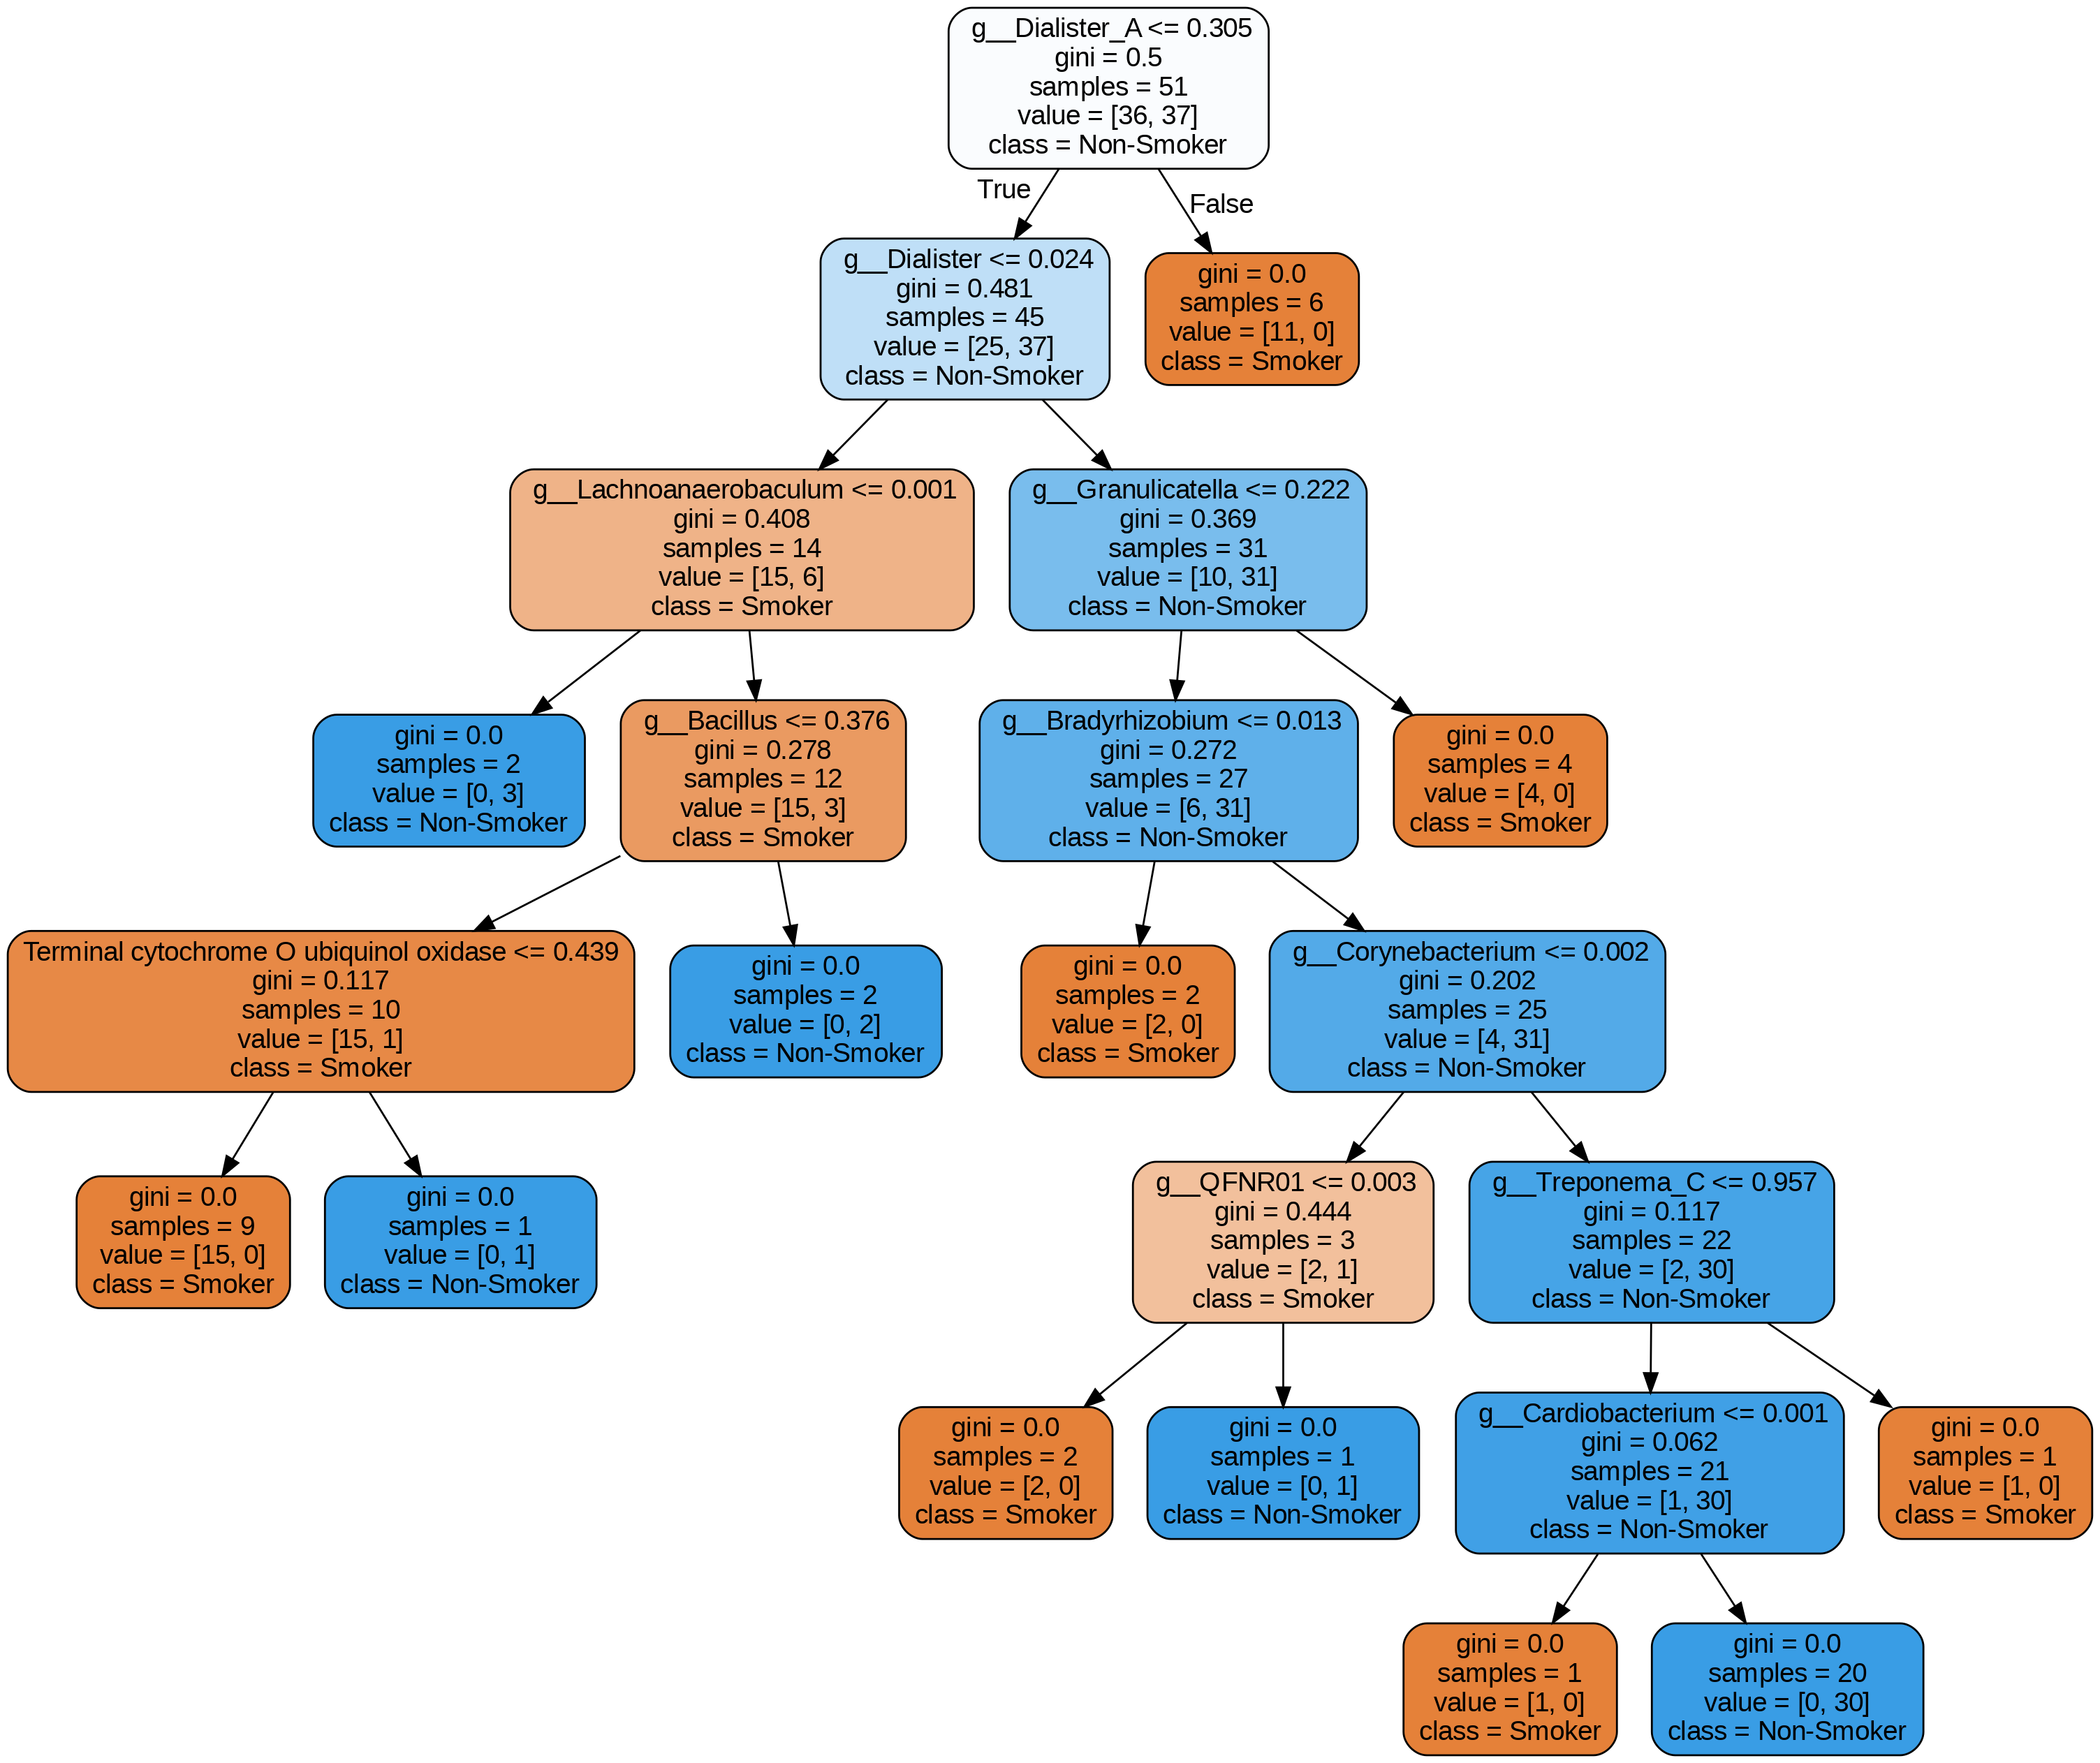

In [ ]:
from subprocess import call
from IPython.display import Image
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

This tree is a little simpler than the solitary decision tree model. Random search found that limiting the maximum depth of the trees in the forest delivers better performance than letting them expand as far as needed.

In [ ]:
importances = best_model.feature_importances_

In [ ]:
im = pd.DataFrame({'No': np.arange(1,130), 'Feature': markers, 'Importance': importances})
imp = im.sort_values(by=['Importance'],ascending = False)
imp.head(5)


No                             Feature  Importance
73    74                    g__Eubacterium_M    0.063725
109  110                      g__Phocaeicola    0.029311
33    34  Pyruvate:ferredoxin oxidoreductase    0.027325
80    81                       g__Filifactor    0.026936
71    72                        g__Eikenella    0.026311

# Classification (Top 10)

## RF Optimizer

In [ ]:
from sklearn.model_selection import train_test_split
X = Xs
y= Xx['Q12_IsSmoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Set random seed to ensure reproducible runs
RSEED = 50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'roc_auc', cv = 3,
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=50, scoring='roc_auc', verbose=1)

In [ ]:
rs.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'max_leaf_nodes': 11,
 'max_features': 0.7999999999999999,
 'max_depth': 16,
 'bootstrap': True}

We can see that the best hyperparameter values are not the defaults. This shows the importance of tuning a model for a specific dataset. Each dataset will have different characteristics, and the model that does best on one dataset will not necessarily do the best across all datasets.

### Use Best Model

Now we can take the best model (it has already been trained) and evaluate it. Hopefully it does better than the stock Random Forest.

In [ ]:
best_model = rs.best_estimator_

In [ ]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 19
Average maximum depth 5


In [ ]:
yy_train = np.where(y_train == 1,0,1)
yy_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0])

In [ ]:
yy_test = np.where(y_test == 1,0,1)
yy_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
yyy_test = y_test.map({1: 0, 2: 1}).astype(int)
yyy_test

30     1
65     0
64     0
53     0
45     0
94     0
104    0
47     0
10     1
0      1
18     1
31     1
89     1
96     0
77     0
4      1
80     0
33     1
12     1
26     1
99     1
55     0
22     1
76     0
44     0
72     0
15     1
42     0
40     0
9      1
85     1
11     1
Name: Q12_IsSmoker, dtype: int64

In [ ]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""

    baseline = {}

    baseline['recall'] = recall_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['precision'] = precision_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['roc'] = 0.5

    results = {}

    results['recall'] = recall_score(yyy_test, predictions)
    results['precision'] = precision_score(yyy_test, predictions)
    results['roc'] = roc_auc_score(yyy_test, probs)

    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(yyy_test, [1 for _ in range(len(yyy_test))])
    model_fpr, model_tpr, _ = roc_curve(yyy_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [ ]:
#from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
#evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The optimized model achieves around the same performance as the default model. More random search iterations could improve performance, or it's possible that we are close the limit of what the random forest can achieve for this problem.

In [ ]:
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.53 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 59.38 %.


In [ ]:
# Perform K-Fold CV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#train model with cv of 3
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}',format(np.mean(cv_scores)))

[0.45714286 0.45714286 0.54285714]
cv_scores mean:{} 0.4857142857142857


### Tree Visualization

In [ ]:
markerss = Xs.columns

In [ ]:
from sklearn.tree import export_graphviz

estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True,
                feature_names=markerss, max_depth = 8,
                class_names = ['Smoker', 'Non-Smoker'], filled = True)

In [ ]:
dft3 = MinMaxScaler().fit_transform(X[markerss])
dft3 = pd.DataFrame(dft3)
dft3.columns = X.columns
dft3.describe()

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
count                 105.000000                  105.000000   
mean                    0.564286                    0.684848   
std                     0.199578                    0.207943   
min                     0.000000                    0.000000   
25%                     0.416667                    0.545455   
50%                     0.583333                    0.727273   
75%                     0.666667                    0.818182   
max                     1.000000                    1.000000   

       Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
count                      105.000000                          105.000000   
mean                         0.275824                            0.434921   
std                          0.122379                            0.255281   
min                          0.000000                            0.000000   
25%                          0.192308                            0.250000   
50%                          0.269231                            0.416667   
75%                          0.346154                            0.583333   
max                          1.000000                            1.000000   

       Q39_BFI-2-xs-Open Mindedness  Peptide methionine sulfoxide reductase  \
count                    105.000000                              105.000000   
mean                       0.540952                                0.265989   
std                        0.211085                                0.256309   
min                        0.000000                                0.000000   
25%                        0.400000                                0.074158   
50%                        0.500000                                0.168941   
75%                        0.700000                                0.427503   
max                        1.000000                                1.000000   

       Pyridoxin (Vitamin B6) Biosynthesis  Terminal cytochrome C oxidases  \
count                           105.000000                      105.000000   
mean                              0.223222                        0.096357   
std                               0.215208                        0.151612   
min                               0.000000                        0.000000   
25%                               0.067491                        0.022448   
50%                               0.144095                        0.048053   
75%                               0.296114                        0.106805   
max                               1.000000                        1.000000   

       Thioredoxin-disulfide reductase  Test Pyridoxin B6  ...  \
count                       105.000000         105.000000  ...   
mean                          0.179610           0.202746  ...   
std                           0.180173           0.201848  ...   
min                           0.000000           0.000000  ...   
25%                           0.062358           0.061830  ...   
50%                           0.120058           0.136935  ...   
75%                           0.229805           0.270311  ...   
max                           1.000000           1.000000  ...   

        g__Haemophilus_D   g__Corynebacterium   g__Streptococcus  \
count         105.000000           105.000000         105.000000   
mean            0.087971             0.021785           0.229442   
std             0.165318             0.103008           0.238120   
min             0.000000             0.000000           0.000000   
25%             0.006035             0.000496           0.059909   
50%             0.019546             0.001677           0.129842   
75%             0.099231             0.005727           0.324006   
max             1.000000             1.000000           1.000000   

        g__Neisseria   g__Veillonella   g__Actinomyces   g__Haemophilus  \
count     105.000000       105.000000 

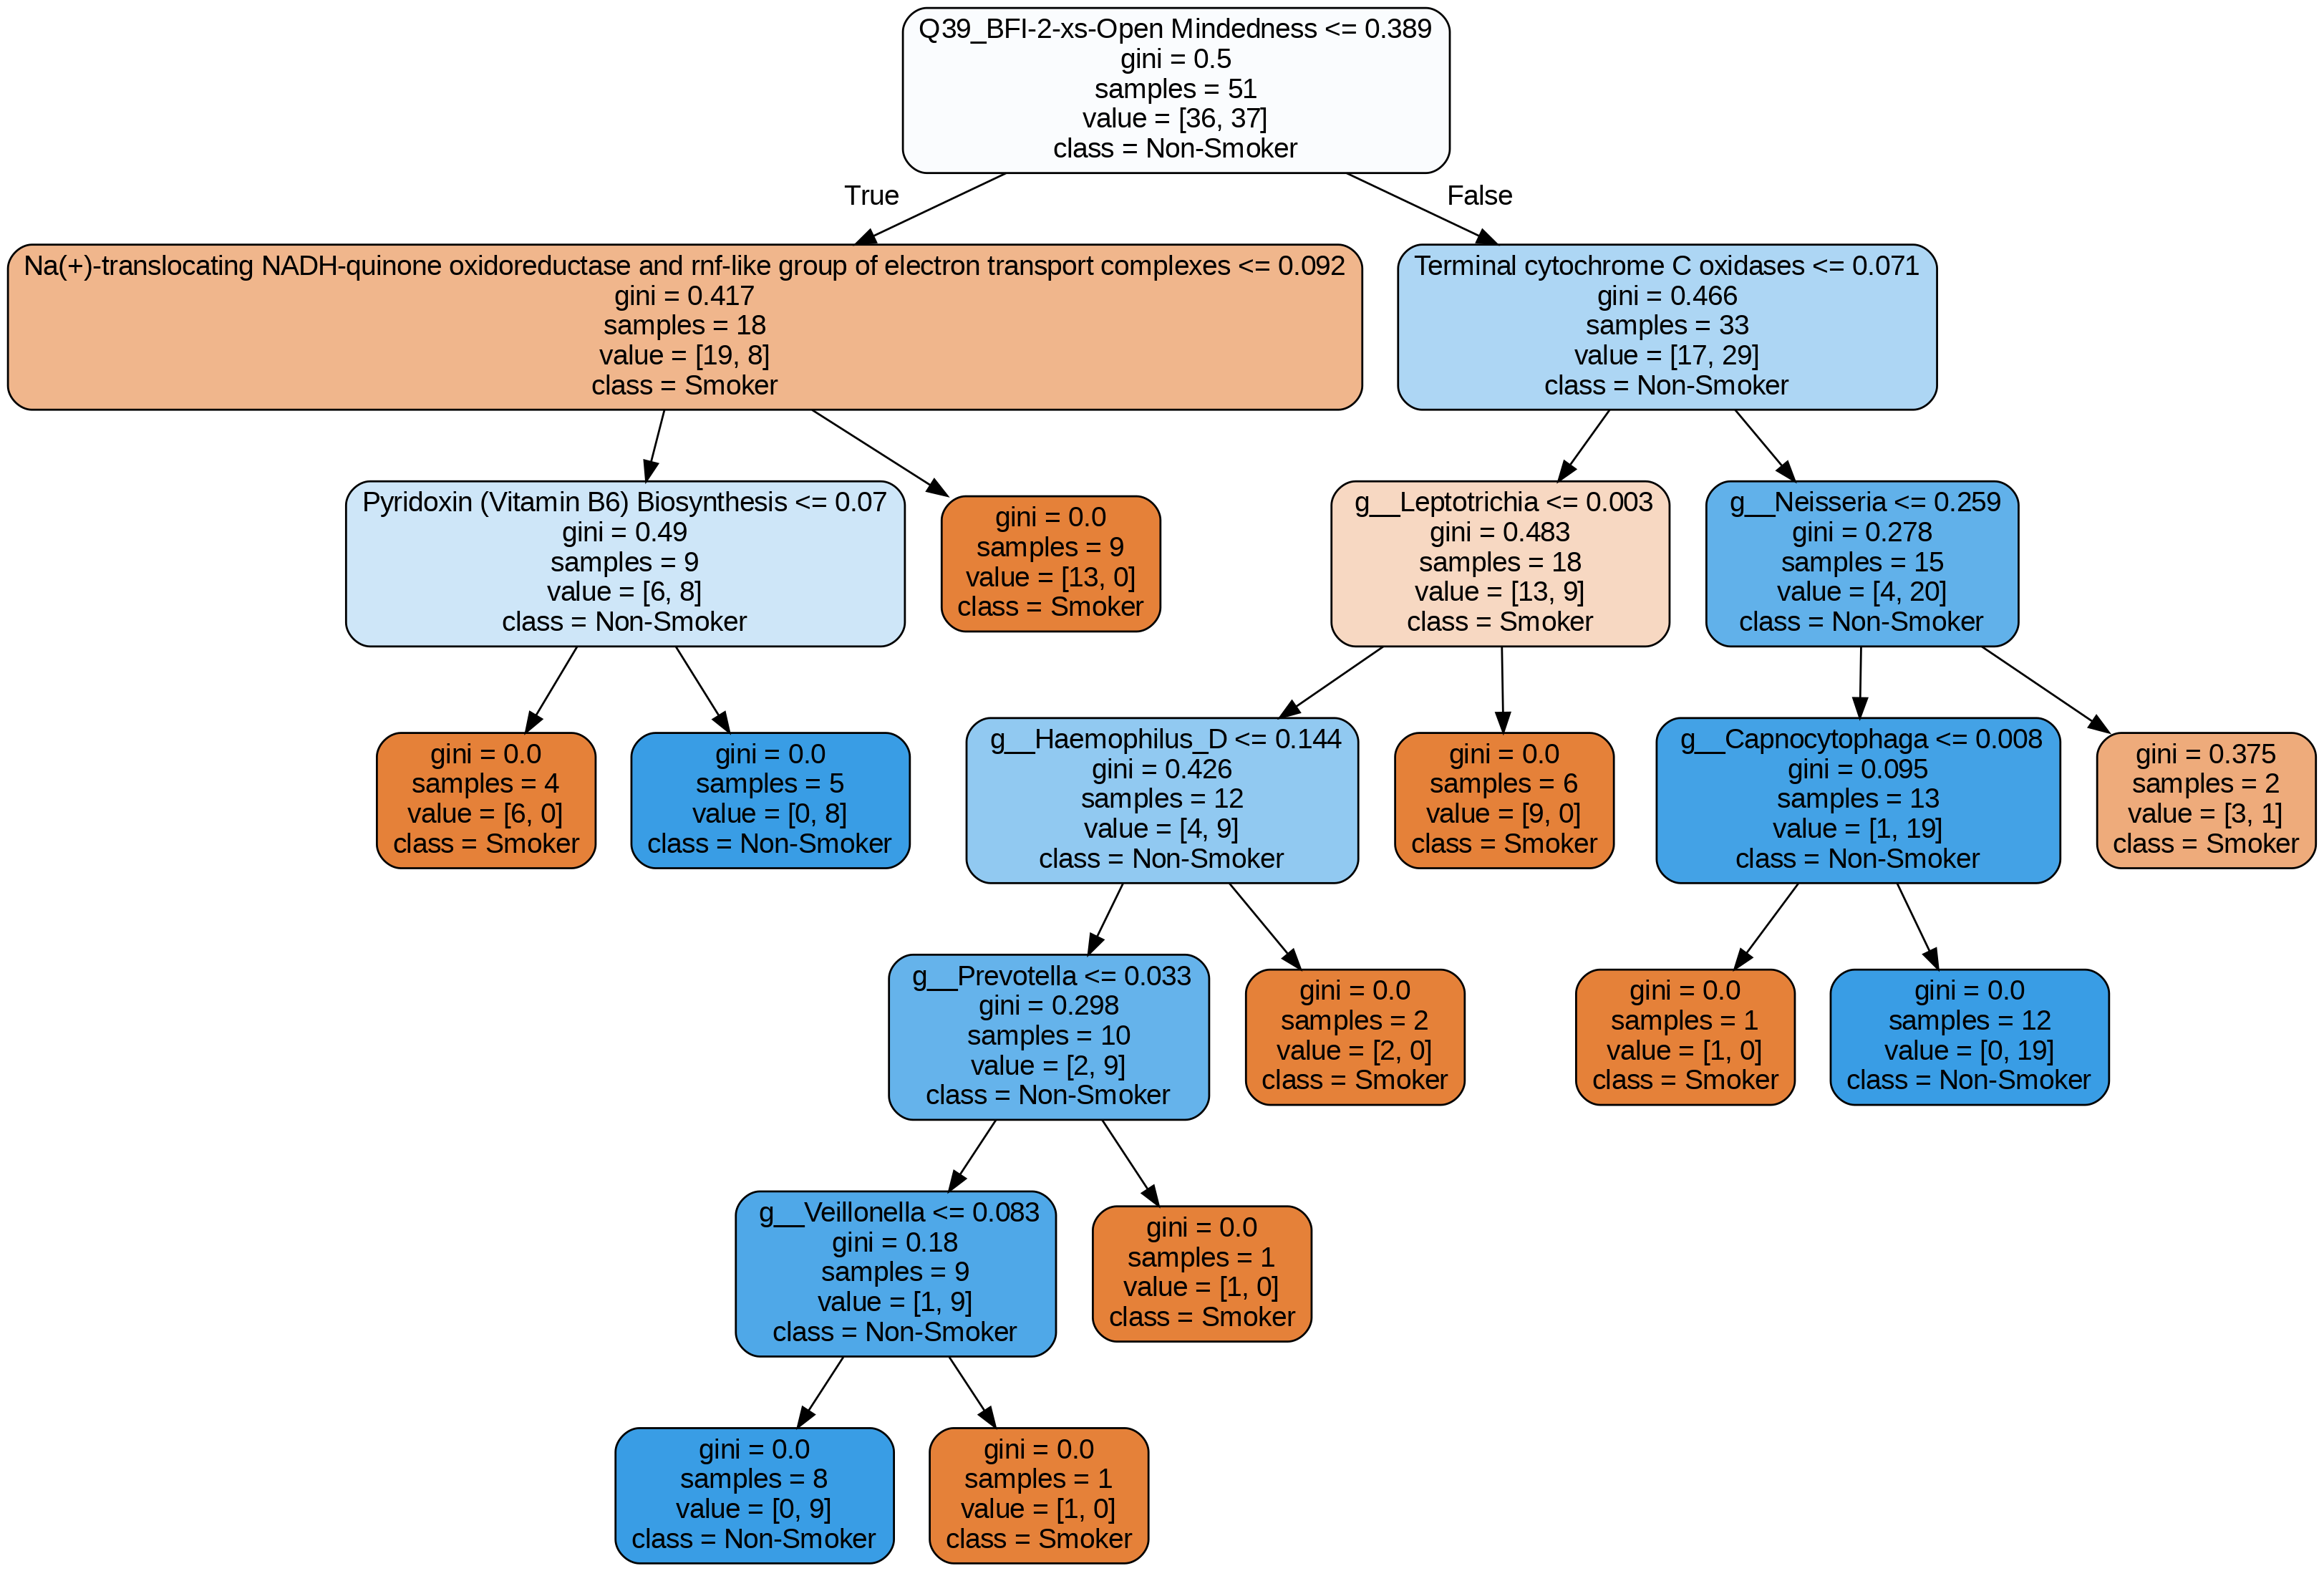

In [ ]:
from subprocess import call
from IPython.display import Image
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

This tree is a little simpler than the solitary decision tree model. Random search found that limiting the maximum depth of the trees in the forest delivers better performance than letting them expand as far as needed.

In [ ]:
importances = best_model.feature_importances_

In [ ]:
im = pd.DataFrame({'No': np.arange(1,26), 'Feature': markerss, 'Importance': importances})
imp = im.sort_values(by=['Importance'],ascending = False)
imp.head(5)


No                       Feature  Importance
18  19                  g__Neisseria    0.071405
19  20                g__Veillonella    0.067677
4    5  Q39_BFI-2-xs-Open Mindedness    0.066446
20  21                g__Actinomyces    0.065584
15  16              g__Haemophilus_D    0.062580

# Classification (Top 5)

## RF Optimizer

In [ ]:
from sklearn.model_selection import train_test_split
X = Xs5
y= Xx['Q12_IsSmoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Set random seed to ensure reproducible runs
RSEED = 50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'roc_auc', cv = 3,
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=50, scoring='roc_auc', verbose=1)

In [ ]:
rs.best_params_

{'n_estimators': 29,
 'min_samples_split': 5,
 'max_leaf_nodes': 43,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

We can see that the best hyperparameter values are not the defaults. This shows the importance of tuning a model for a specific dataset. Each dataset will have different characteristics, and the model that does best on one dataset will not necessarily do the best across all datasets.

### Use Best Model

Now we can take the best model (it has already been trained) and evaluate it. Hopefully it does better than the stock Random Forest.

In [ ]:
best_model = rs.best_estimator_

In [ ]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 25
Average maximum depth 6


In [ ]:
yy_train = np.where(y_train == 1,0,1)
yy_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0])

In [ ]:
yy_test = np.where(y_test == 1,0,1)
yy_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
yyy_test = y_test.map({1: 0, 2: 1}).astype(int)
yyy_test

30     1
65     0
64     0
53     0
45     0
94     0
104    0
47     0
10     1
0      1
18     1
31     1
89     1
96     0
77     0
4      1
80     0
33     1
12     1
26     1
99     1
55     0
22     1
76     0
44     0
72     0
15     1
42     0
40     0
9      1
85     1
11     1
Name: Q12_IsSmoker, dtype: int64

In [ ]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""

    baseline = {}

    baseline['recall'] = recall_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['precision'] = precision_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['roc'] = 0.5

    results = {}

    results['recall'] = recall_score(yyy_test, predictions)
    results['precision'] = precision_score(yyy_test, predictions)
    results['roc'] = roc_auc_score(yyy_test, probs)

    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(yyy_test, [1 for _ in range(len(yyy_test))])
    model_fpr, model_tpr, _ = roc_curve(yyy_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [ ]:
#from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
#evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The optimized model achieves around the same performance as the default model. More random search iterations could improve performance, or it's possible that we are close the limit of what the random forest can achieve for this problem.

In [ ]:
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.53 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 59.38 %.


In [ ]:
# Perform K-Fold CV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#train model with cv of 3
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}',format(np.mean(cv_scores)))

[0.45714286 0.48571429 0.37142857]
cv_scores mean:{} 0.4380952380952381


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

### Tree Visualization

In [ ]:
markerss = X.columns

In [ ]:
from sklearn.tree import export_graphviz

estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True,
                feature_names=markerss, max_depth = 8,
                class_names = ['Smoker', 'Non-Smoker'], filled = True)

In [ ]:
dft3 = MinMaxScaler().fit_transform(X[markerss])
dft3 = pd.DataFrame(dft3)
dft3.columns = X.columns
dft3.describe()

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
count                 105.000000                  105.000000   
mean                    0.564286                    0.684848   
std                     0.199578                    0.207943   
min                     0.000000                    0.000000   
25%                     0.416667                    0.545455   
50%                     0.583333                    0.727273   
75%                     0.666667                    0.818182   
max                     1.000000                    1.000000   

       Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
count                      105.000000                          105.000000   
mean                         0.275824                            0.434921   
std                          0.122379                            0.255281   
min                          0.000000                            0.000000   
25%                          0.192308                            0.250000   
50%                          0.269231                            0.416667   
75%                          0.346154                            0.583333   
max                          1.000000                            1.000000   

       Q39_BFI-2-xs-Open Mindedness  Peptide methionine sulfoxide reductase  \
count                    105.000000                              105.000000   
mean                       0.540952                                0.265989   
std                        0.211085                                0.256309   
min                        0.000000                                0.000000   
25%                        0.400000                                0.074158   
50%                        0.500000                                0.168941   
75%                        0.700000                                0.427503   
max                        1.000000                                1.000000   

       Pyridoxin (Vitamin B6) Biosynthesis  Terminal cytochrome C oxidases  \
count                           105.000000                      105.000000   
mean                              0.223222                        0.096357   
std                               0.215208                        0.151612   
min                               0.000000                        0.000000   
25%                               0.067491                        0.022448   
50%                               0.144095                        0.048053   
75%                               0.296114                        0.106805   
max                               1.000000                        1.000000   

       Thioredoxin-disulfide reductase  Test Pyridoxin B6   g__Haemophilus_D  \
count                       105.000000         105.000000         105.000000   
mean                          0.179610           0.202746           0.087971   
std                           0.180173           0.201848           0.165318   
min                           0.000000           0.000000           0.000000   
25%                           0.062358           0.061830           0.006035   
50%                           0.120058           0.136935           0.019546   
75%                           0.229805           0.270311           0.099231   
max                           1.000000           1.000000           1.000000   

        g__Corynebacterium   g__Streptococcus   g__Neisseria   g__Veillonella  
count           105.000000         105.000000     105.000000       105.000000  
mean              0.021785           0.229442       0.059793         0.042863  
std               0.103008           0.238120       0.132244         0.108424  
min               0.000000           0.000000       0.000000         0.000000  
25%               0.000496           0.059909       0.006697         0.005582  
50%               0.001677           0.129842       0.020040         0.015799  
75%               0.005727           0.3

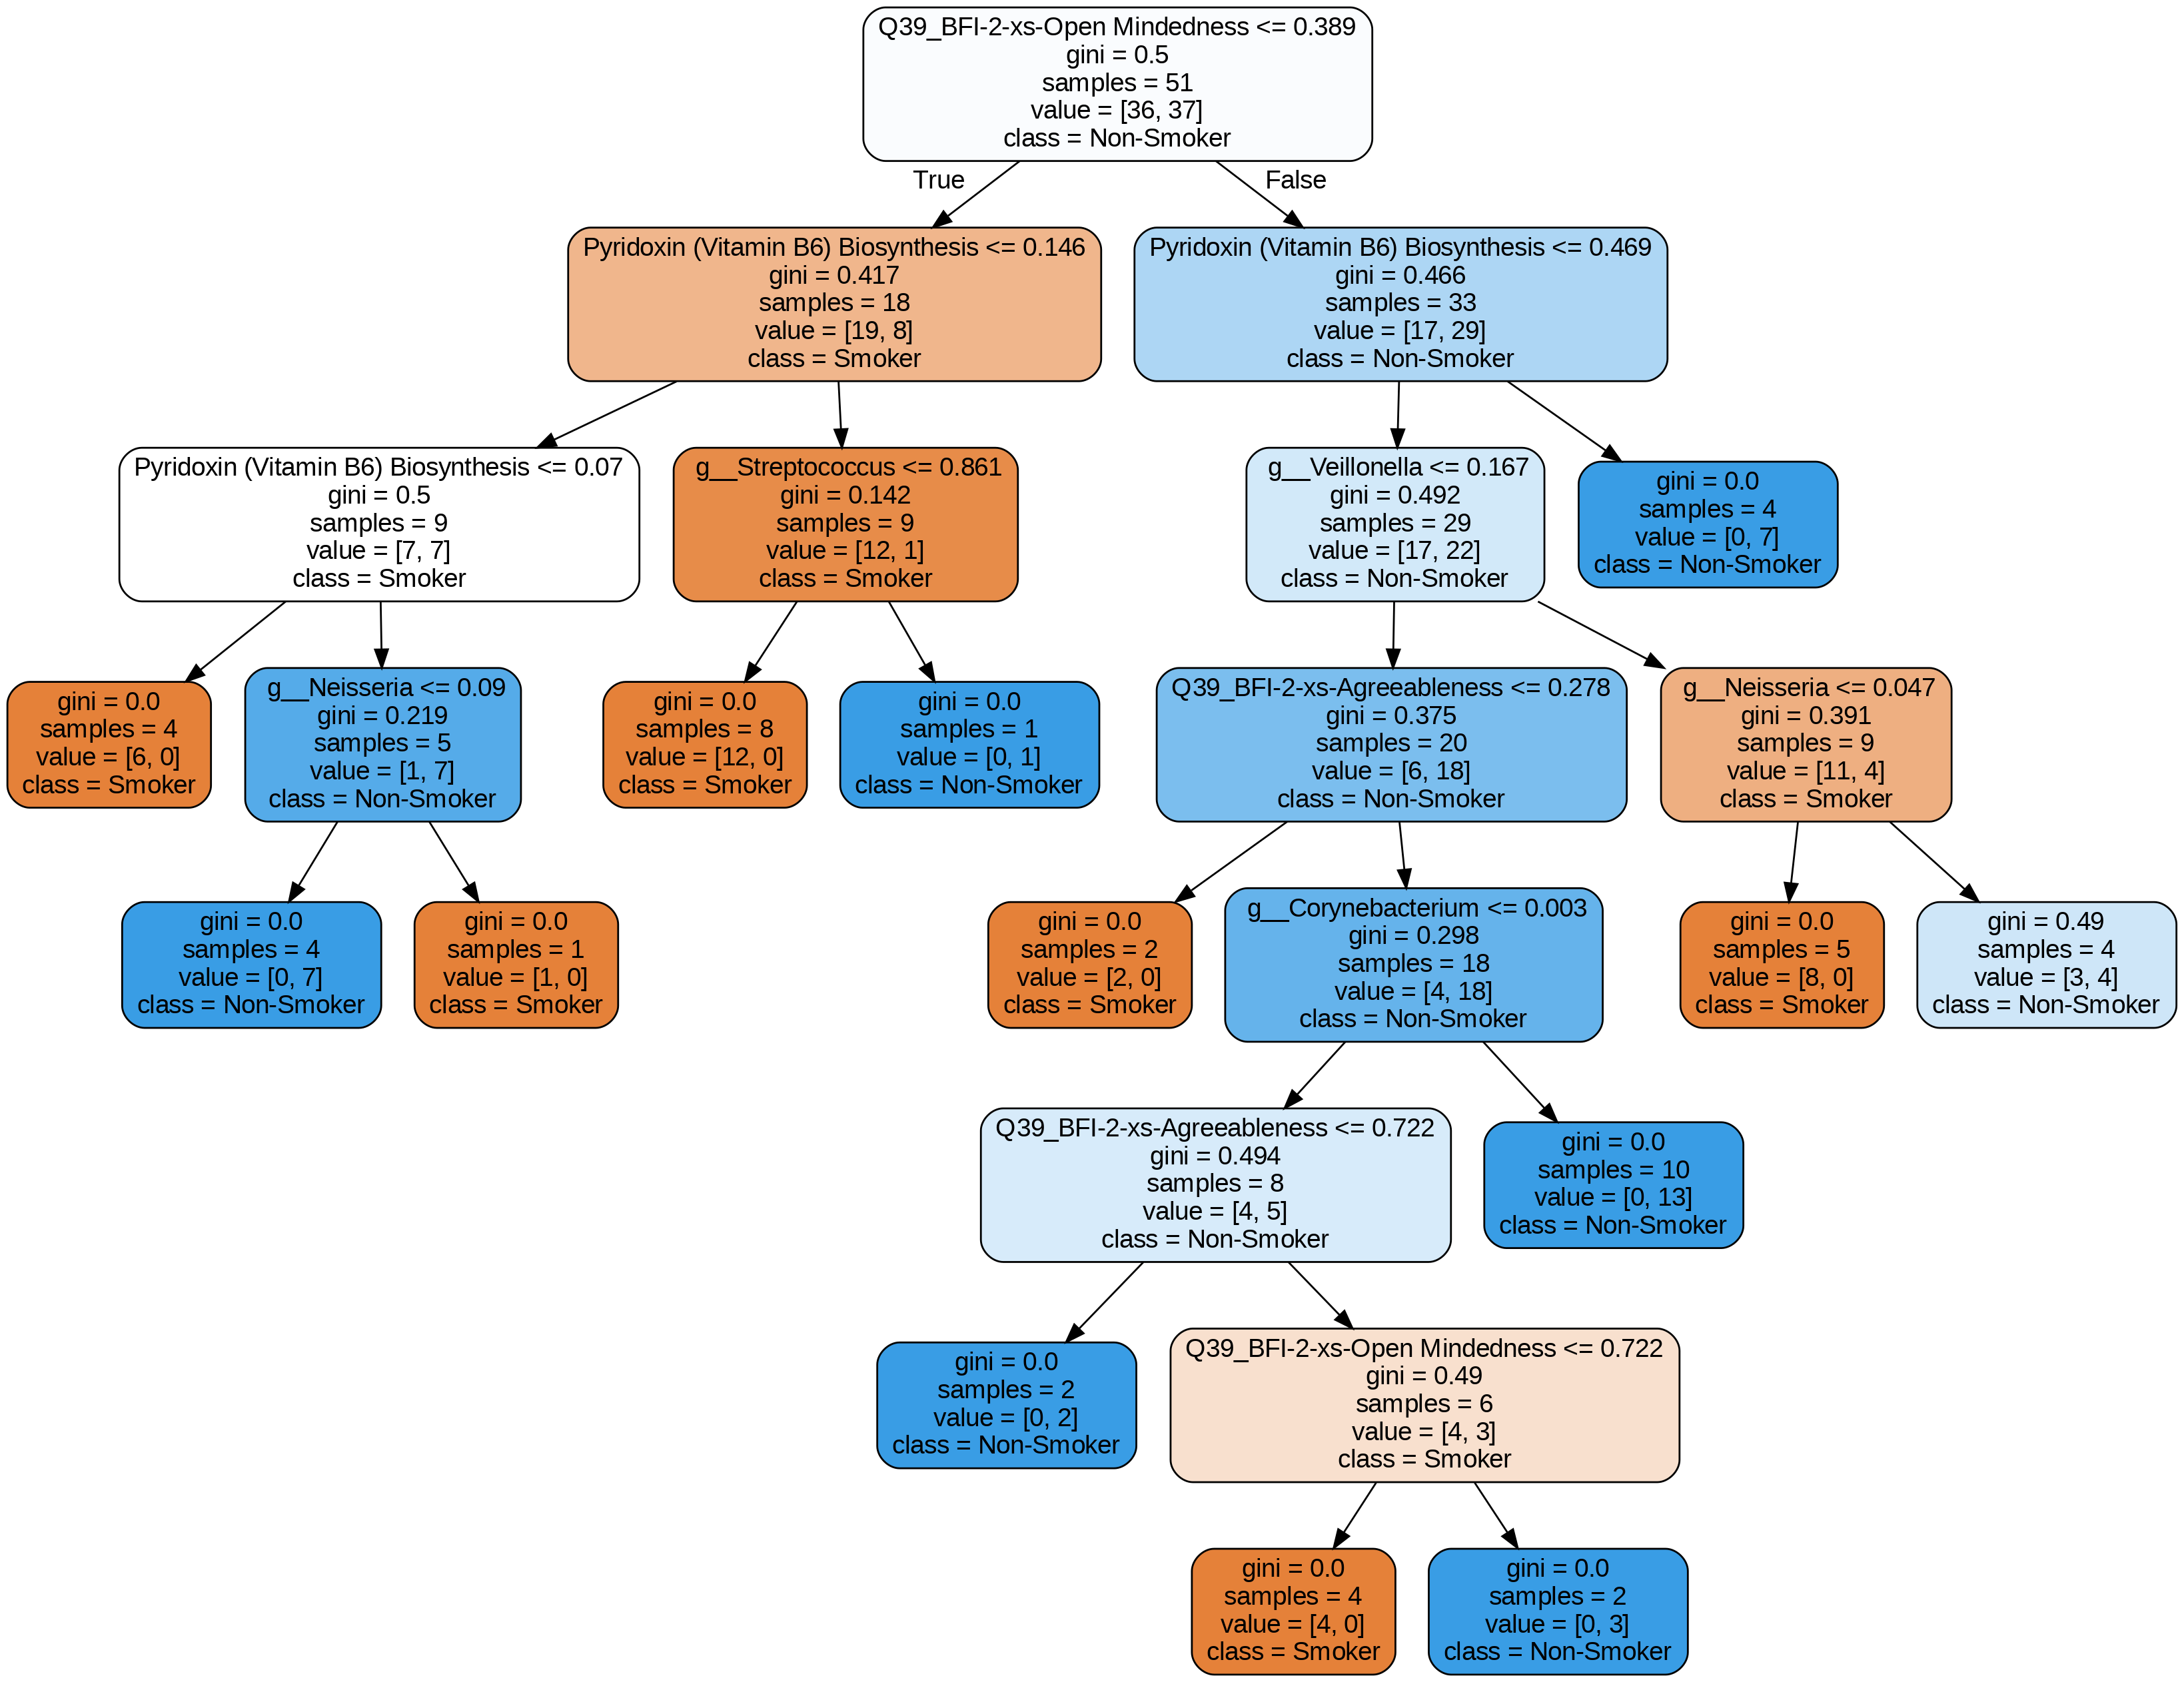

In [ ]:
from subprocess import call
from IPython.display import Image
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

This tree is a little simpler than the solitary decision tree model. Random search found that limiting the maximum depth of the trees in the forest delivers better performance than letting them expand as far as needed.

In [ ]:
importances = best_model.feature_importances_

In [ ]:
im = pd.DataFrame({'No': np.arange(1,len(markerss)+1), 'Feature': markerss, 'Importance': importances})
imp = im.sort_values(by=['Importance'],ascending = False)
imp.head(5)


No                          Feature  Importance
8    9  Thioredoxin-disulfide reductase    0.109497
13  14                     g__Neisseria    0.108360
14  15                   g__Veillonella    0.094304
11  12               g__Corynebacterium    0.086852
10  11                 g__Haemophilus_D    0.081653

# Classification (Top 3)

## RF Optimizer

In [ ]:
from sklearn.model_selection import train_test_split
X = Xs3
y= Xx['Q12_IsSmoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Set random seed to ensure reproducible runs
RSEED = 50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'roc_auc', cv = 3,
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=50, scoring='roc_auc', verbose=1)

In [ ]:
rs.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'max_leaf_nodes': 11,
 'max_features': 0.7999999999999999,
 'max_depth': 16,
 'bootstrap': True}

We can see that the best hyperparameter values are not the defaults. This shows the importance of tuning a model for a specific dataset. Each dataset will have different characteristics, and the model that does best on one dataset will not necessarily do the best across all datasets.

### Use Best Model

Now we can take the best model (it has already been trained) and evaluate it. Hopefully it does better than the stock Random Forest.

In [ ]:
best_model = rs.best_estimator_

In [ ]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 20
Average maximum depth 6


In [ ]:
yy_train = np.where(y_train == 1,0,1)
yy_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0])

In [ ]:
yy_test = np.where(y_test == 1,0,1)
yy_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
yyy_test = y_test.map({1: 0, 2: 1}).astype(int)
yyy_test

30     1
65     0
64     0
53     0
45     0
94     0
104    0
47     0
10     1
0      1
18     1
31     1
89     1
96     0
77     0
4      1
80     0
33     1
12     1
26     1
99     1
55     0
22     1
76     0
44     0
72     0
15     1
42     0
40     0
9      1
85     1
11     1
Name: Q12_IsSmoker, dtype: int64

In [ ]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""

    baseline = {}

    baseline['recall'] = recall_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['precision'] = precision_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['roc'] = 0.5

    results = {}

    results['recall'] = recall_score(yyy_test, predictions)
    results['precision'] = precision_score(yyy_test, predictions)
    results['roc'] = roc_auc_score(yyy_test, probs)

    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(yyy_test, [1 for _ in range(len(yyy_test))])
    model_fpr, model_tpr, _ = roc_curve(yyy_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [ ]:
#from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
#evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The optimized model achieves around the same performance as the default model. More random search iterations could improve performance, or it's possible that we are close the limit of what the random forest can achieve for this problem.

In [ ]:
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.41 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 70.31 %.


In [ ]:
# Perform K-Fold CV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#train model with cv of 3
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}',format(np.mean(cv_scores)))

[0.42857143 0.37142857 0.54285714]
cv_scores mean:{} 0.44761904761904764


### Tree Visualization

In [ ]:
markerss = X.columns

In [ ]:
from sklearn.tree import export_graphviz

estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True,
                feature_names=markerss, max_depth = 8,
                class_names = ['Smoker', 'Non-Smoker'], filled = True)

In [ ]:
dft3 = MinMaxScaler().fit_transform(X[markerss])
dft3 = pd.DataFrame(dft3)
dft3.columns = X.columns
dft3.describe()

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
count                 105.000000                  105.000000   
mean                    0.564286                    0.684848   
std                     0.199578                    0.207943   
min                     0.000000                    0.000000   
25%                     0.416667                    0.545455   
50%                     0.583333                    0.727273   
75%                     0.666667                    0.818182   
max                     1.000000                    1.000000   

       Q39_BFI-2-xs-Conscientiousness  Peptide methionine sulfoxide reductase  \
count                      105.000000                              105.000000   
mean                         0.275824                                0.265989   
std                          0.122379                                0.256309   
min                          0.000000                                0.000000   
25%                          0.192308                                0.074158   
50%                          0.269231                                0.168941   
75%                          0.346154                                0.427503   
max                          1.000000                                1.000000   

       Pyridoxin (Vitamin B6) Biosynthesis  Terminal cytochrome C oxidases  \
count                           105.000000                      105.000000   
mean                              0.223222                        0.096357   
std                               0.215208                        0.151612   
min                               0.000000                        0.000000   
25%                               0.067491                        0.022448   
50%                               0.144095                        0.048053   
75%                               0.296114                        0.106805   
max                               1.000000                        1.000000   

        g__Haemophilus_D   g__Corynebacterium   g__Streptococcus  
count         105.000000           105.000000         105.000000  
mean            0.087971             0.021785           0.229442  
std             0.165318             0.103008           0.238120  
min             0.000000             0.000000           0.000000  
25%             0.006035             0.000496           0.059909  
50%             0.019546             0.001677           0.129842  
75%             0.099231             0.005727           0.324006  
max             1.000000             1.000000           1.000000

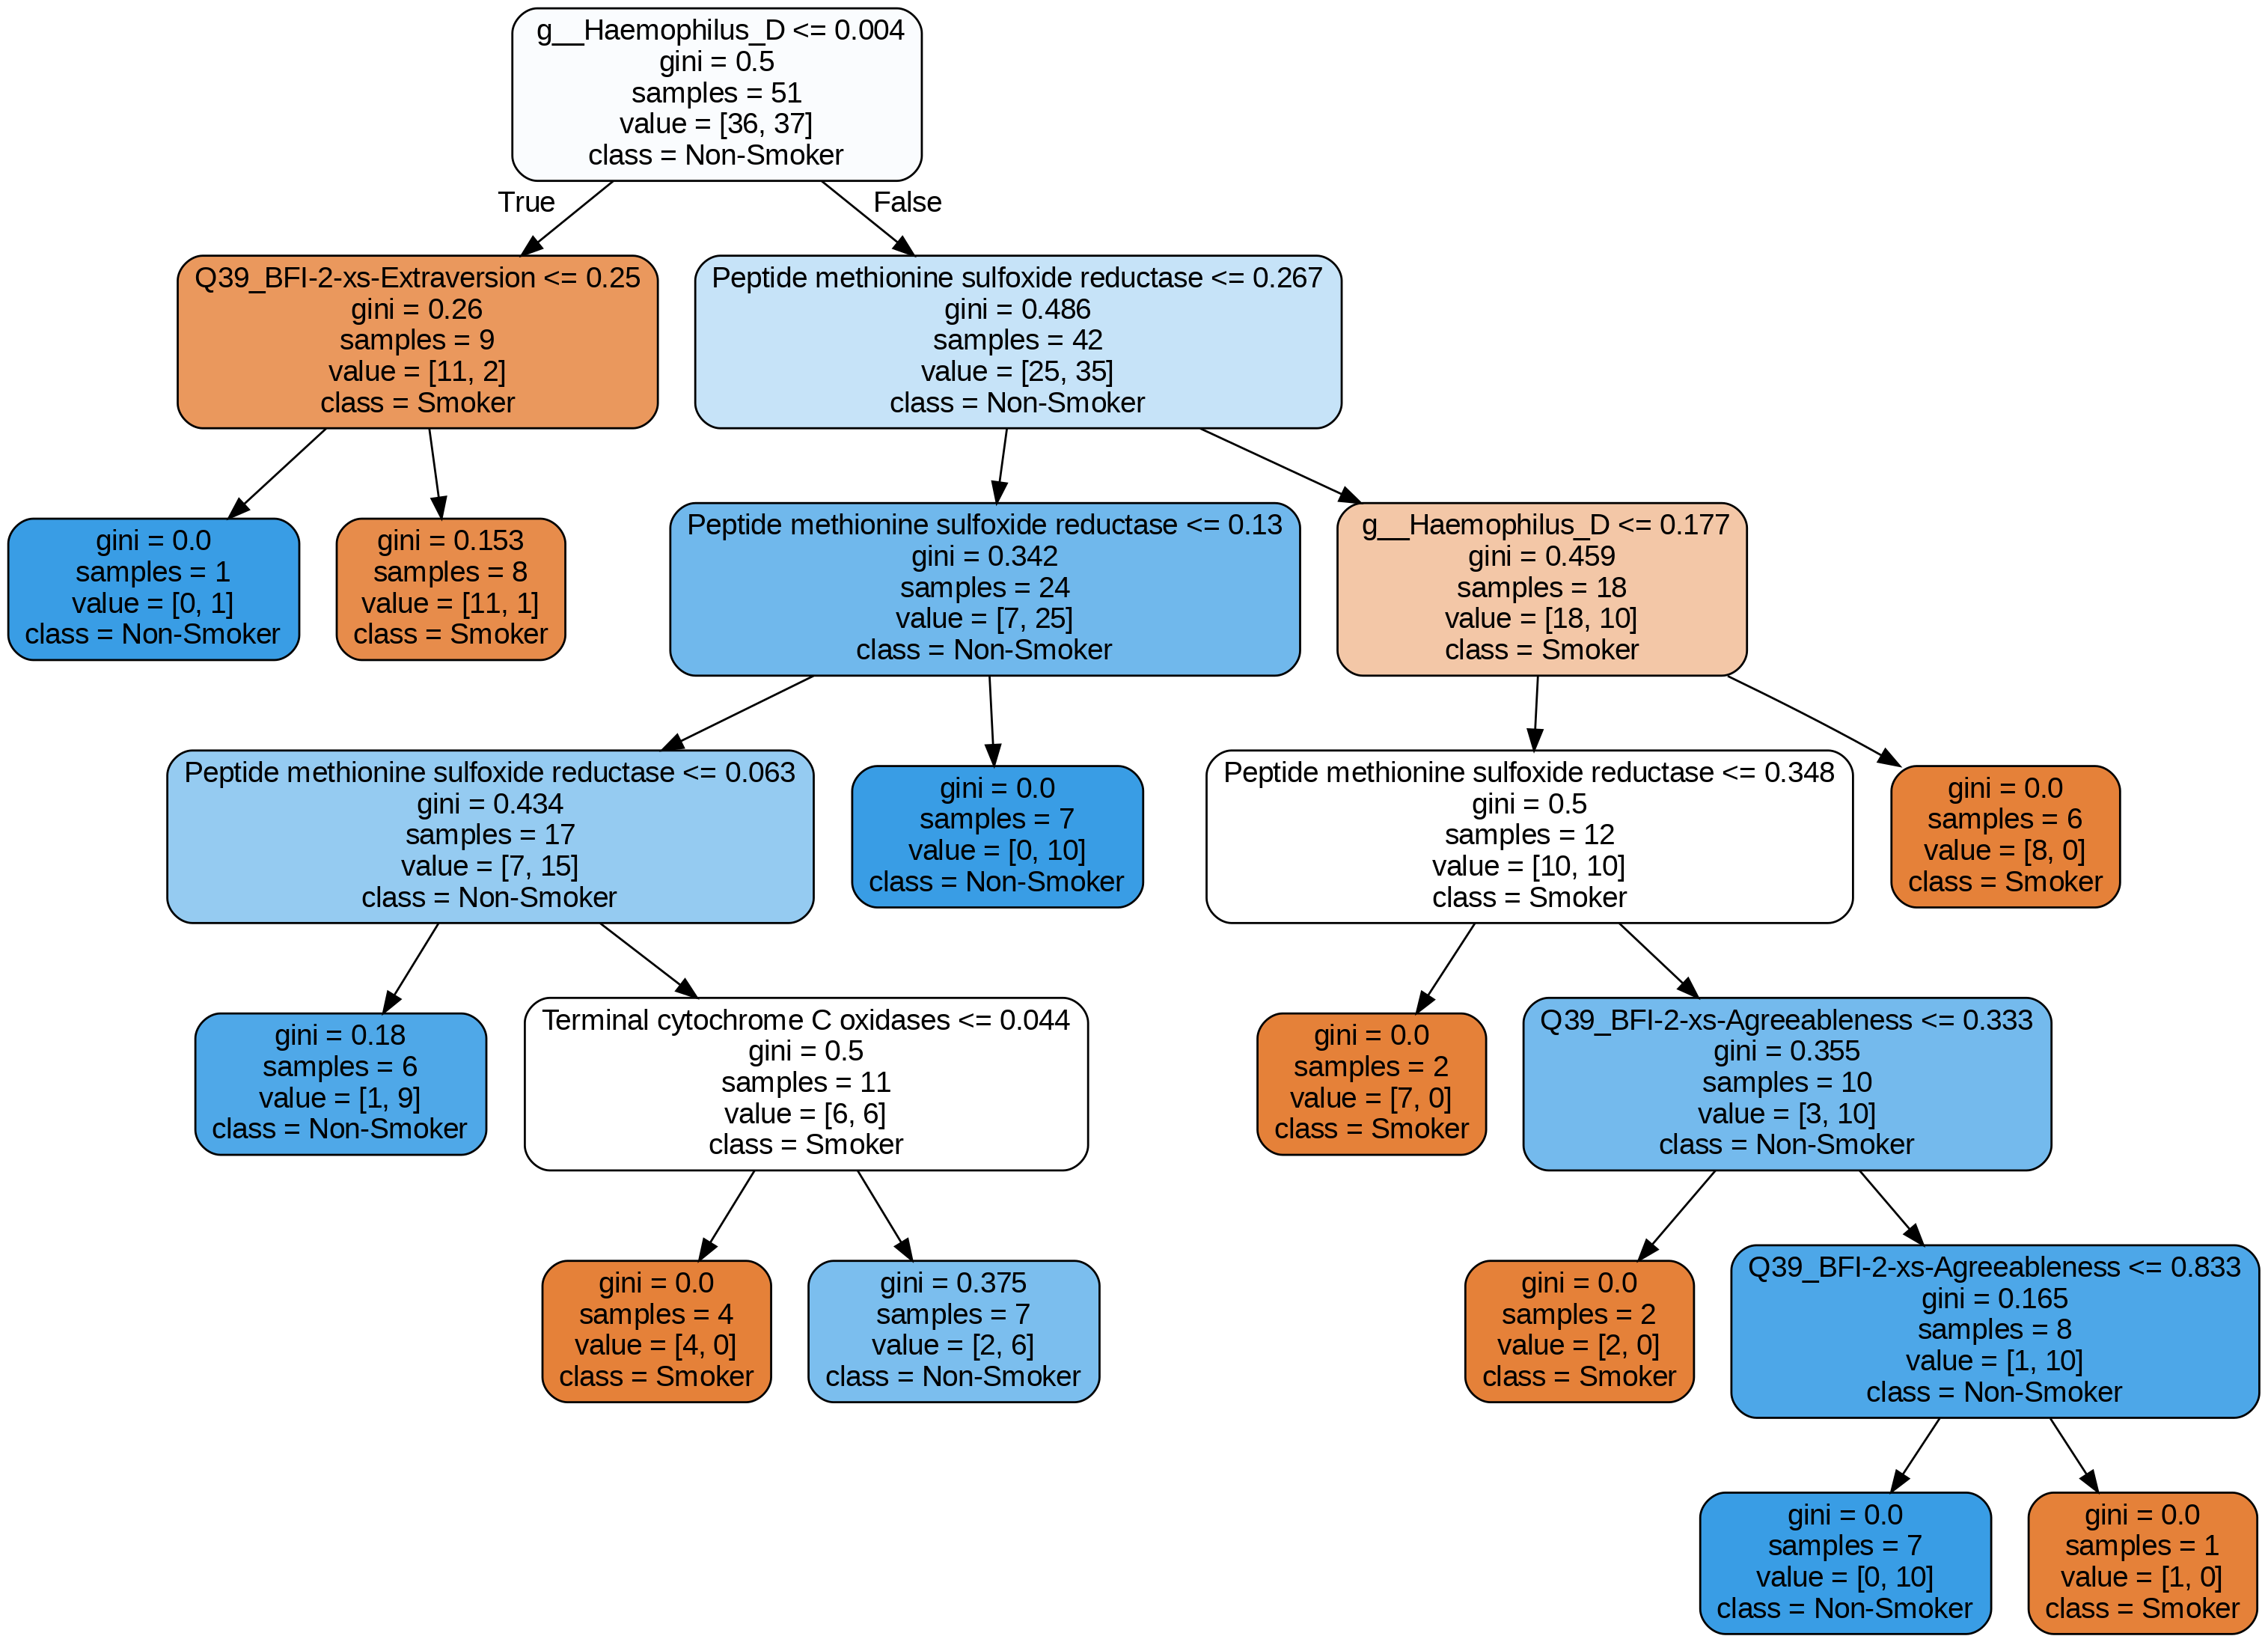

In [ ]:
from subprocess import call
from IPython.display import Image
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

This tree is a little simpler than the solitary decision tree model. Random search found that limiting the maximum depth of the trees in the forest delivers better performance than letting them expand as far as needed.

In [ ]:
importances = best_model.feature_importances_

In [ ]:
im = pd.DataFrame({'No': np.arange(1,len(markerss)+1), 'Feature': markerss, 'Importance': importances})
imp = im.sort_values(by=['Importance'],ascending = False)
imp.head(5)


No                                 Feature  Importance
6   7                        g__Haemophilus_D    0.203211
7   8                      g__Corynebacterium    0.153642
3   4  Peptide methionine sulfoxide reductase    0.134535
4   5     Pyridoxin (Vitamin B6) Biosynthesis    0.100600
8   9                        g__Streptococcus    0.099740

# Classification (Top 1)

## RF Optimizer

In [ ]:
from sklearn.model_selection import train_test_split
X = Xs1
y= Xx['Q12_IsSmoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Set random seed to ensure reproducible runs
RSEED = 50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'roc_auc', cv = 3,
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=50, scoring='roc_auc', verbose=1)

In [ ]:
rs.best_params_

{'n_estimators': 153,
 'min_samples_split': 10,
 'max_leaf_nodes': 26,
 'max_features': 0.7,
 'max_depth': 7,
 'bootstrap': False}

We can see that the best hyperparameter values are not the defaults. This shows the importance of tuning a model for a specific dataset. Each dataset will have different characteristics, and the model that does best on one dataset will not necessarily do the best across all datasets.

### Use Best Model

Now we can take the best model (it has already been trained) and evaluate it. Hopefully it does better than the stock Random Forest.

In [ ]:
best_model = rs.best_estimator_

In [ ]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 23
Average maximum depth 7


In [ ]:
yy_train = np.where(y_train == 1,0,1)
yy_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0])

In [ ]:
yy_test = np.where(y_test == 1,0,1)
yy_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
yyy_test = y_test.map({1: 0, 2: 1}).astype(int)
yyy_test

30     1
65     0
64     0
53     0
45     0
94     0
104    0
47     0
10     1
0      1
18     1
31     1
89     1
96     0
77     0
4      1
80     0
33     1
12     1
26     1
99     1
55     0
22     1
76     0
44     0
72     0
15     1
42     0
40     0
9      1
85     1
11     1
Name: Q12_IsSmoker, dtype: int64

In [ ]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""

    baseline = {}

    baseline['recall'] = recall_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['precision'] = precision_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['roc'] = 0.5

    results = {}

    results['recall'] = recall_score(yyy_test, predictions)
    results['precision'] = precision_score(yyy_test, predictions)
    results['roc'] = roc_auc_score(yyy_test, probs)

    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(yyy_test, [1 for _ in range(len(yyy_test))])
    model_fpr, model_tpr, _ = roc_curve(yyy_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [ ]:
#from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
#evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The optimized model achieves around the same performance as the default model. More random search iterations could improve performance, or it's possible that we are close the limit of what the random forest can achieve for this problem.

In [ ]:
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.5 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 60.94 %.


In [ ]:
# Perform K-Fold CV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#train model with cv of 3
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}',format(np.mean(cv_scores)))

[0.45714286 0.45714286 0.54285714]
cv_scores mean:{} 0.4857142857142857


### Tree Visualization

In [ ]:
markerss = X.columns

In [ ]:
from sklearn.tree import export_graphviz

estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True,
                feature_names=markerss, max_depth = 8,
                class_names = ['Smoker', 'Non-Smoker'], filled = True)

In [ ]:
dft3 = MinMaxScaler().fit_transform(X[markerss])
dft3 = pd.DataFrame(dft3)
dft3.columns = X.columns
dft3.describe()

Q39_BFI-2-xs-Extraversion  Peptide methionine sulfoxide reductase  \
count                 105.000000                              105.000000   
mean                    0.564286                                0.265989   
std                     0.199578                                0.256309   
min                     0.000000                                0.000000   
25%                     0.416667                                0.074158   
50%                     0.583333                                0.168941   
75%                     0.666667                                0.427503   
max                     1.000000                                1.000000   

        g__Haemophilus_D  
count         105.000000  
mean            0.087971  
std             0.165318  
min             0.000000  
25%             0.006035  
50%             0.019546  
75%             0.099231  
max             1.000000

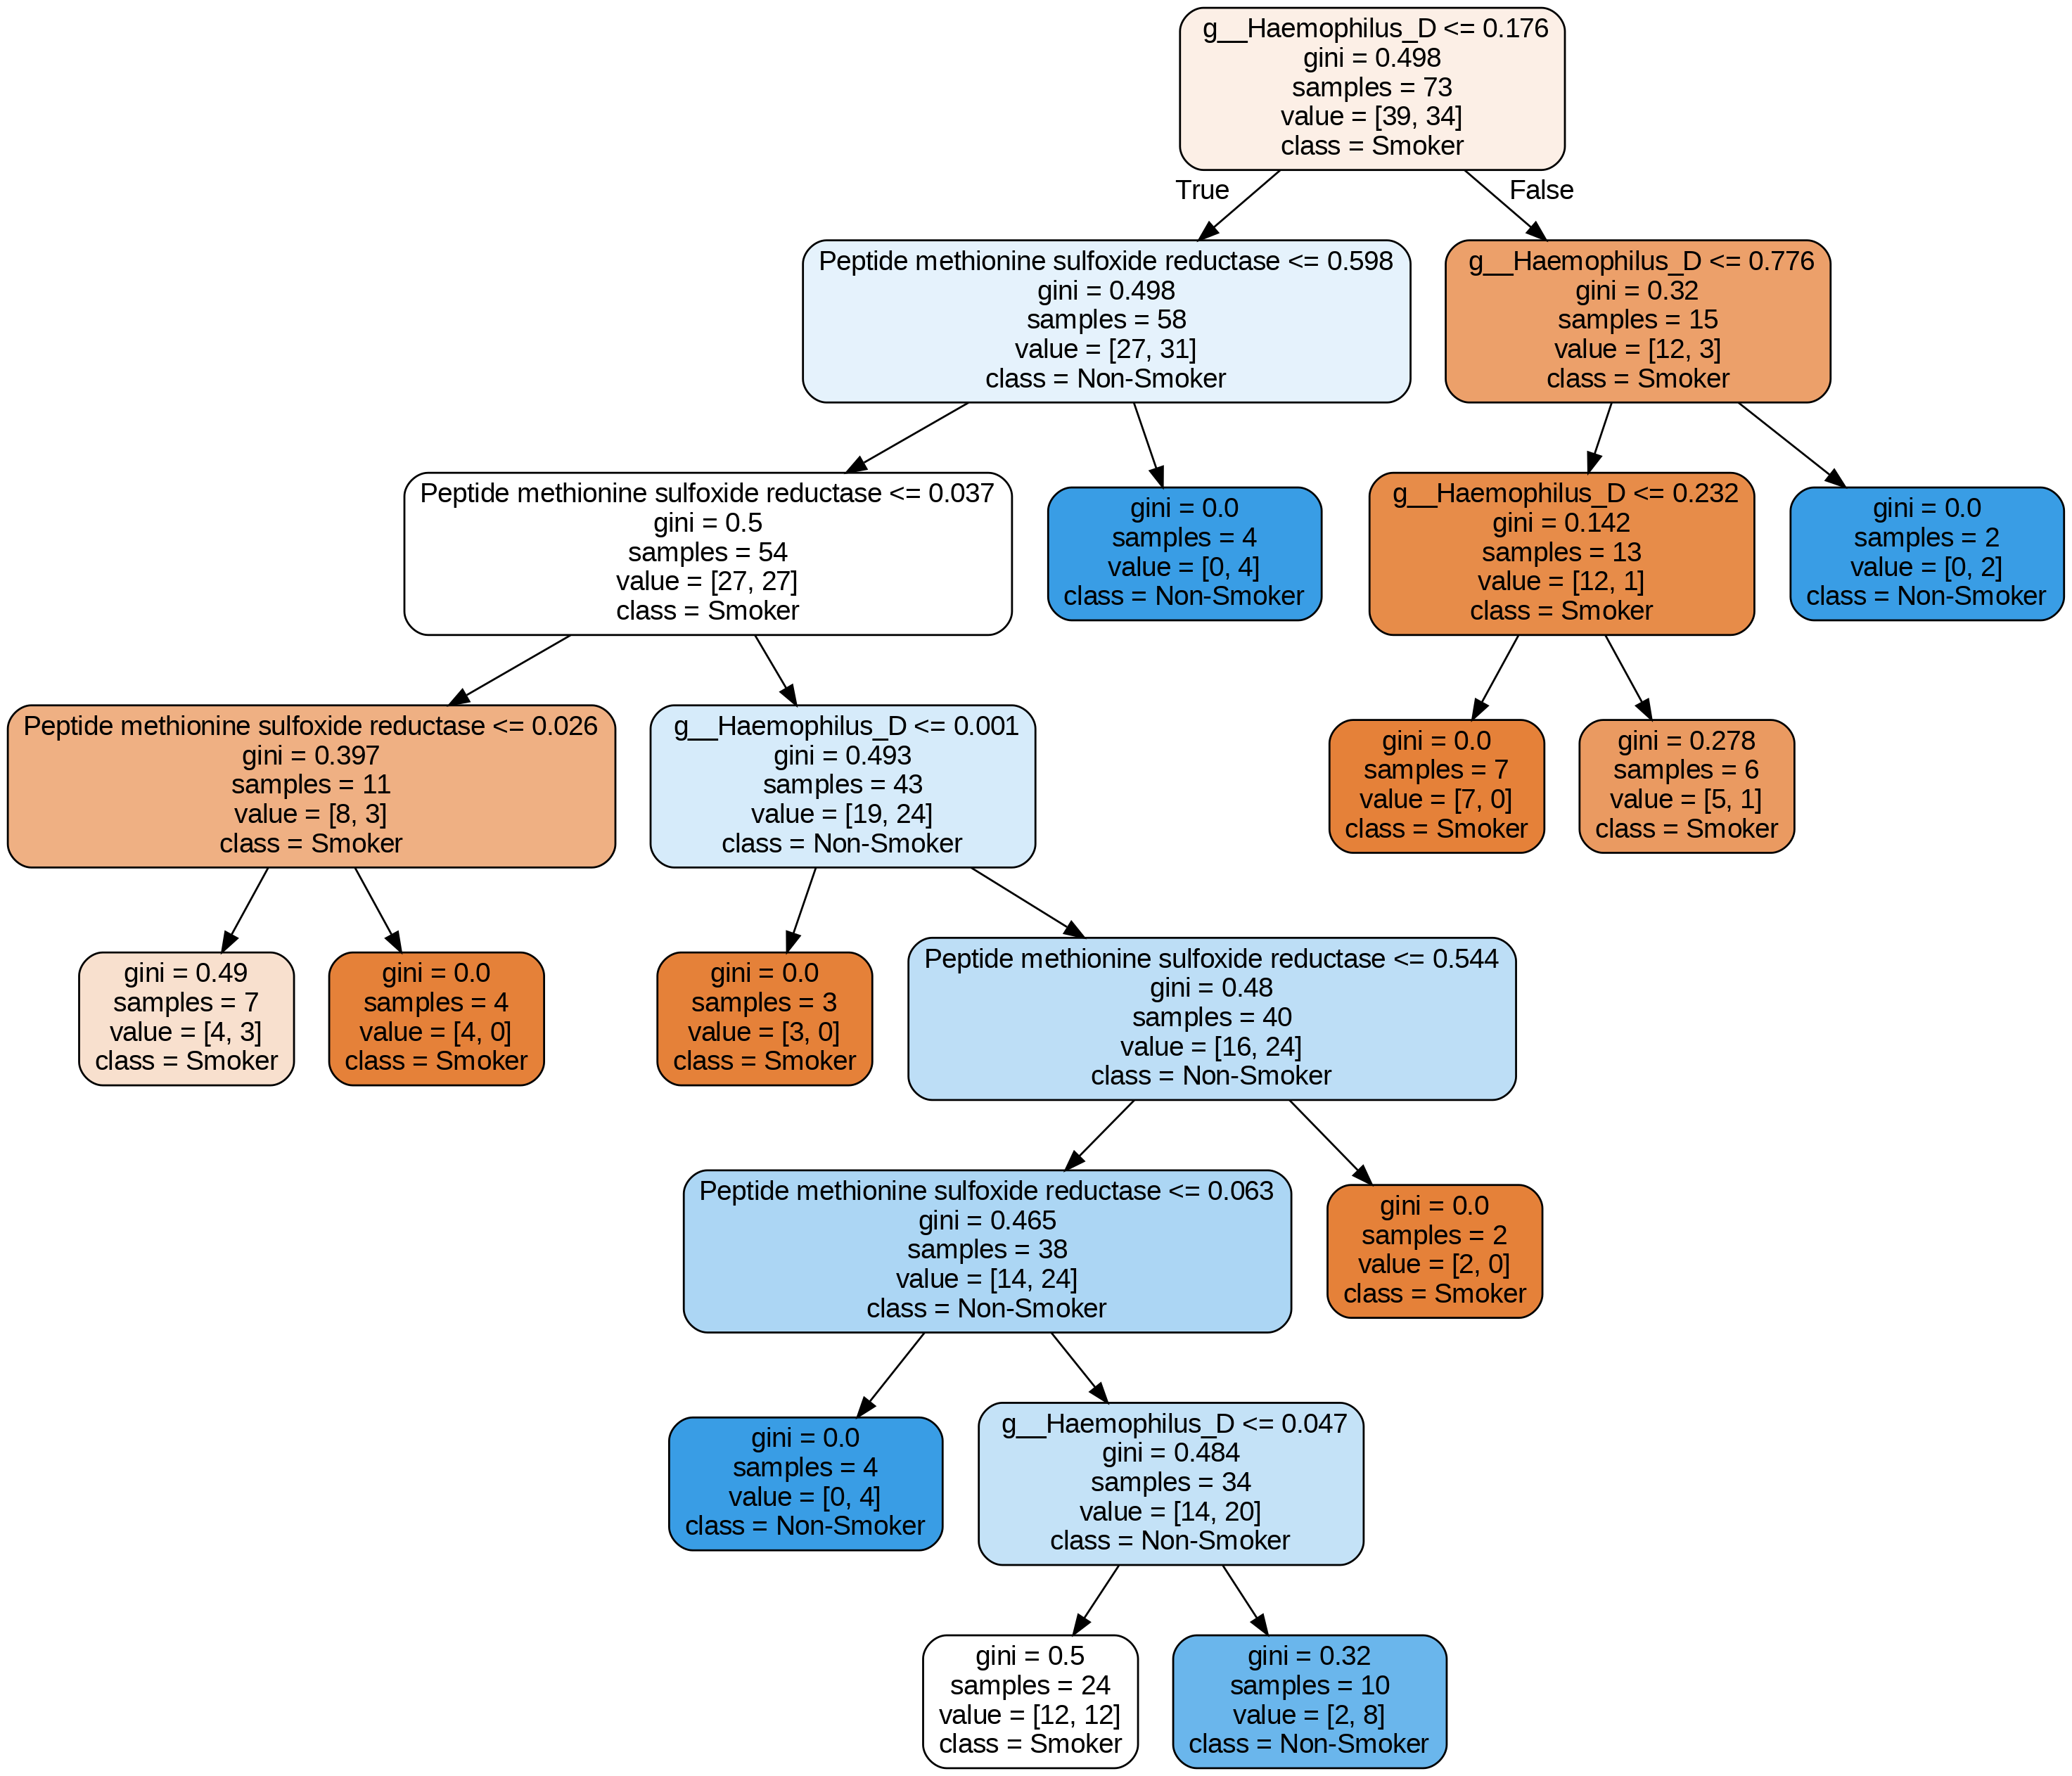

In [ ]:
from subprocess import call
from IPython.display import Image
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

This tree is a little simpler than the solitary decision tree model. Random search found that limiting the maximum depth of the trees in the forest delivers better performance than letting them expand as far as needed.

In [ ]:
importances = best_model.feature_importances_

In [ ]:
im = pd.DataFrame({'No': np.arange(1,len(markerss)+1), 'Feature': markerss, 'Importance': importances})
imp = im.sort_values(by=['Importance'],ascending = False)
imp.head(5)


No                                 Feature  Importance
2   3                        g__Haemophilus_D    0.653393
1   2  Peptide methionine sulfoxide reductase    0.227387
0   1               Q39_BFI-2-xs-Extraversion    0.119220

# Classification - x3 in Fig 1 & 2 in Albataineh (2020)

## RF Optimizer

In [ ]:
from sklearn.model_selection import train_test_split
X = x3f12
y= Xx['Q12_IsSmoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#markerss = x3f12.columns

In [ ]:
# Set random seed to ensure reproducible runs
RSEED = 50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'roc_auc', cv = 3,
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=50, scoring='roc_auc', verbose=1)

In [ ]:
rs.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'max_leaf_nodes': 17,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

We can see that the best hyperparameter values are not the defaults. This shows the importance of tuning a model for a specific dataset. Each dataset will have different characteristics, and the model that does best on one dataset will not necessarily do the best across all datasets.

### Use Best Model

Now we can take the best model (it has already been trained) and evaluate it. Hopefully it does better than the stock Random Forest.

In [ ]:
best_model = rs.best_estimator_

In [ ]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 16
Average maximum depth 4


In [ ]:
yy_train = np.where(y_train == 1,0,1)
yy_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0])

In [ ]:
yy_test = np.where(y_test == 1,0,1)
yy_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
yyy_test = y_test.map({1: 0, 2: 1}).astype(int)
yyy_test

30     1
65     0
64     0
53     0
45     0
94     0
104    0
47     0
10     1
0      1
18     1
31     1
89     1
96     0
77     0
4      1
80     0
33     1
12     1
26     1
99     1
55     0
22     1
76     0
44     0
72     0
15     1
42     0
40     0
9      1
85     1
11     1
Name: Q12_IsSmoker, dtype: int64

In [ ]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""

    baseline = {}

    baseline['recall'] = recall_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['precision'] = precision_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['roc'] = 0.5

    results = {}

    results['recall'] = recall_score(yyy_test, predictions)
    results['precision'] = precision_score(yyy_test, predictions)
    results['roc'] = roc_auc_score(yyy_test, probs)

    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(yyy_test, [1 for _ in range(len(yyy_test))])
    model_fpr, model_tpr, _ = roc_curve(yyy_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [ ]:
#from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
#evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The optimized model achieves around the same performance as the default model. More random search iterations could improve performance, or it's possible that we are close the limit of what the random forest can achieve for this problem.

In [ ]:
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.41 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 70.31 %.


In [ ]:
# Perform K-Fold CV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#train model with cv of 3
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}',format(np.mean(cv_scores)))

[0.51428571 0.51428571 0.51428571]
cv_scores mean:{} 0.5142857142857142


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

### Tree Visualization

In [ ]:
markerss = X.columns

In [ ]:
from sklearn.tree import export_graphviz

estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True,
                feature_names=markerss, max_depth = 8,
                class_names = ['Smoker', 'Non-Smoker'], filled = True)

In [ ]:
dft3 = MinMaxScaler().fit_transform(X[markerss])
dft3 = pd.DataFrame(dft3)
dft3.columns = X.columns
dft3.describe()

g__Gemella   g__Streptococcus   g__Veillonella   g__Leptotrichia  \
count   105.000000         105.000000       105.000000        105.000000   
mean      0.080172           0.229442         0.042863          0.046857   
std       0.150438           0.238120         0.108424          0.146726   
min       0.000000           0.000000         0.000000          0.000000   
25%       0.006079           0.059909         0.005582          0.001612   
50%       0.022324           0.129842         0.015799          0.007290   
75%       0.069392           0.324006         0.036244          0.017011   
max       1.000000           1.000000         1.000000          1.000000   

        g__Neisseria_D   g__Prevotella   g__Haemophilus_A  \
count       105.000000      105.000000         105.000000   
mean          0.042501        0.074152           0.044654   
std           0.123827        0.127520           0.125620   
min           0.000000        0.000000           0.000000   
25%           0.003285        0.015903           0.002087   
50%           0.007978        0.028476           0.008658   
75%           0.022526        0.077930           0.035333   
max           1.000000        1.000000           1.000000   

        g__Aggregatibacter   g__Campylobacter_A   g__Fusobacterium  \
count           105.000000           105.000000         105.000000   
mean              0.136853             0.087212           0.066377   
std               0.194346             0.156535           0.136944   
min               0.000000             0.000000           0.000000   
25%               0.024107             0.020775           0.011246   
50%               0.059818             0.037655           0.025424   
75%               0.161015             0.076980           0.061829   
max               1.000000             1.000000           1.000000   

        g__Peptostreptococcus   g__Bacillus  
count              105.000000    105.000000  
mean                 0.022692      0.320391  
std                  0.099965      0.191829  
min                  0.000000      0.000000  
25%                  0.001862      0.188034  
50%                  0.003724      0.324786  
75%                  0.015829      0.410256  
max                  1.000000      1.000000

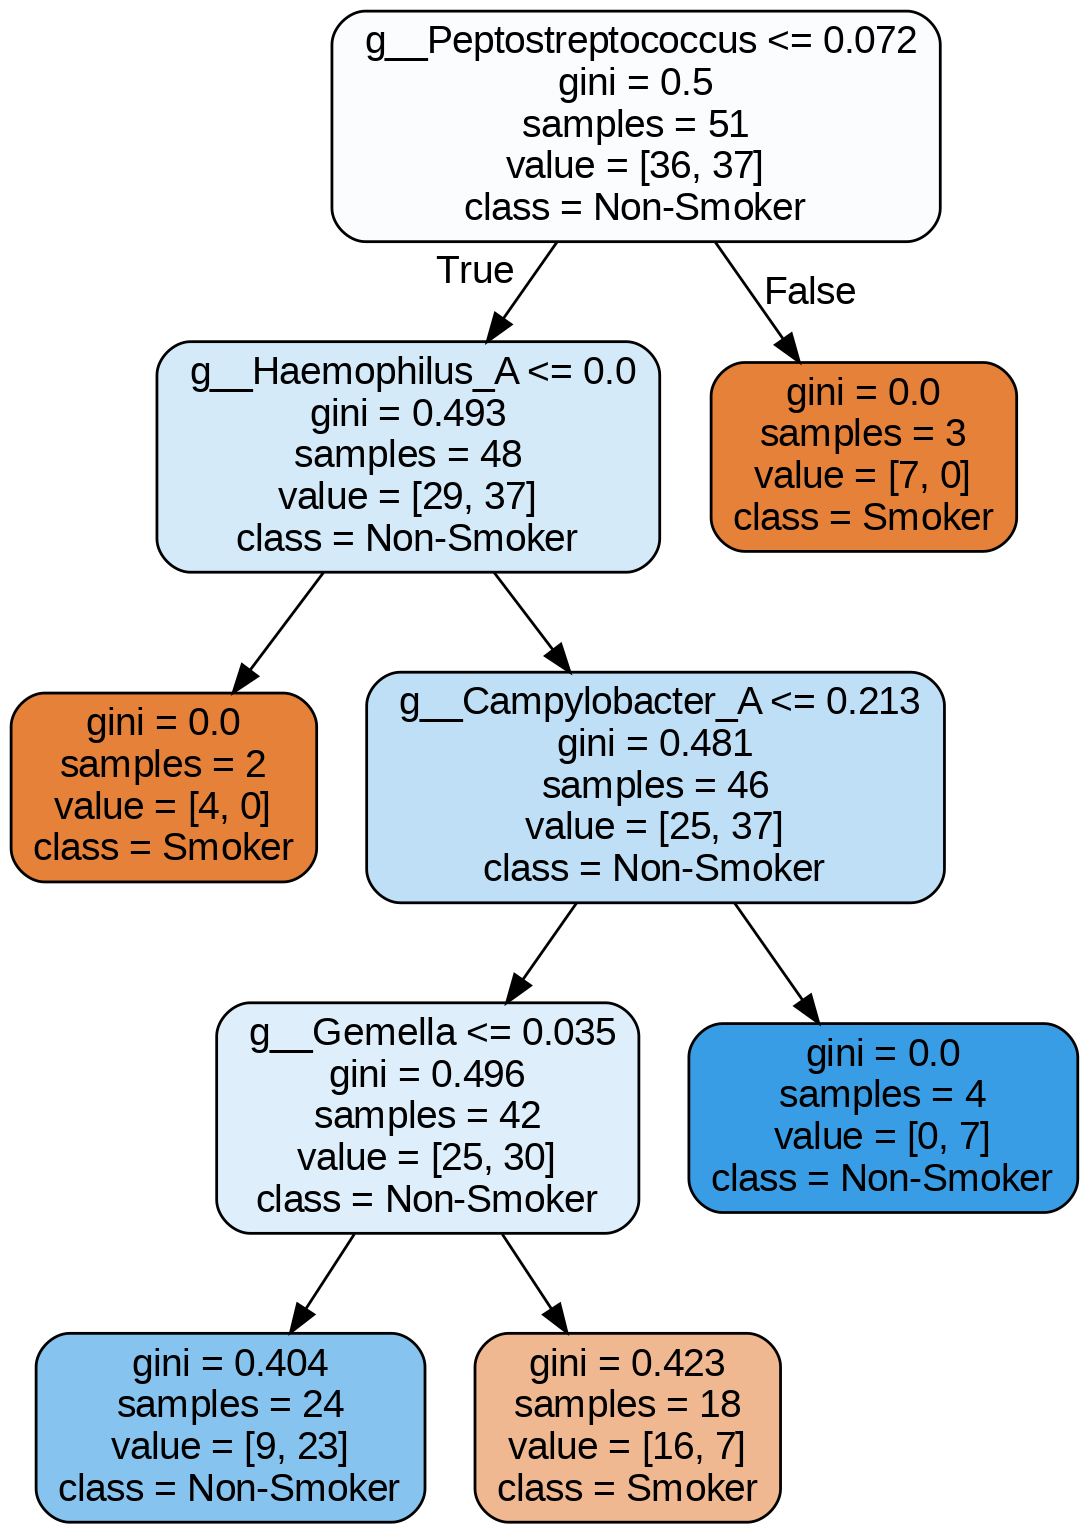

In [ ]:
from subprocess import call
from IPython.display import Image
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

This tree is a little simpler than the solitary decision tree model. Random search found that limiting the maximum depth of the trees in the forest delivers better performance than letting them expand as far as needed.

In [ ]:
importances = best_model.feature_importances_

In [ ]:
im = pd.DataFrame({'No': np.arange(1,len(markerss)+1), 'Feature': markerss, 'Importance': importances})
imp = im.sort_values(by=['Importance'],ascending = False)
imp.head(5)


No                 Feature  Importance
6    7        g__Haemophilus_A    0.151998
4    5          g__Neisseria_D    0.123771
10  11   g__Peptostreptococcus    0.116402
7    8      g__Aggregatibacter    0.103188
1    2        g__Streptococcus    0.079122

# Classification (x1, x2, x3 x3 in Fig 1 & 2 in Albataineh (2020))

## RF Optimizer

In [ ]:
Xs1f = pd.concat([x12c,x3f12],1)
Xs1f

<ipython-input-298-ab42dbd458a1>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  Xs1f = pd.concat([x12c,x3f12],1)


Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
0                           10                          11   
1                           12                          14   
2                           11                          13   
3                            8                          10   
4                            9                          13   
..                         ...                         ...   
100                          7                           9   
101                          7                          10   
102                         11                          12   
103                          9                           9   
104                         13                          10   

     Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
0                                 6                                  12   
1                                15                                   4   
2                                11                                   9   
3                                 4                                  13   
4                                14                                   8   
..                              ...                                 ...   
100                               9                                  11   
101                              10                                  13   
102                               9                                   8   
103                               9                                   9   
104                              13                                   3   

     Q39_BFI-2-xs-Open Mindedness  \
0                               9   
1                              13   
2                               7   
3                              10   
4                              11   
..                            ...   
100                            12   
101                            10   
102                             7   
103                             9   
104                            10   

     Anaerobic Oxidative Degradation of L-Ornithine  \
0                                                 1   
1                                                 0   
2                                                 2   
3                                                 1   
4                                                 0   
..                                              ...   
100                                               0   
101                                               0   
102                                               3   
103                                               2   
104                                               0   

     Biogenesis of cbb3-type cytochrome c oxidases  \
0                                        29.666667   
1                                         3.500000   
2                                         5.833333   
3                                         6.166667   
4                                         2.333333   
..                                             ...   
100                                      16.833333   
101                                      12.833333   
102                                       9.500000   
103                                       2.500000   
104                                       7.900000   

     Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  \
0                              18.166667                   0.0   
1                               2.000000                   0.0   
2                               5.750000                   0.0   
3                               6.750000                   0.0   
4                               2.000000                   0.0   
..                                   ...                   ...   
100                             7.583333                   1.0   
101                            10.500000                   0.5   
102       

In [ ]:
from sklearn.model_selection import train_test_split
X = Xs1f
y= Xx['Q12_IsSmoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#markerss = Xs1f.columns

In [ ]:
# Set random seed to ensure reproducible runs
RSEED = 50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1,
                        scoring = 'roc_auc', cv = 3,
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=50, scoring='roc_auc', verbose=1)

In [ ]:
rs.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'max_leaf_nodes': 11,
 'max_features': 0.7999999999999999,
 'max_depth': 16,
 'bootstrap': True}

We can see that the best hyperparameter values are not the defaults. This shows the importance of tuning a model for a specific dataset. Each dataset will have different characteristics, and the model that does best on one dataset will not necessarily do the best across all datasets.

### Use Best Model

Now we can take the best model (it has already been trained) and evaluate it. Hopefully it does better than the stock Random Forest.

In [ ]:
best_model = rs.best_estimator_

In [ ]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 17
Average maximum depth 4


In [ ]:
yy_train = np.where(y_train == 1,0,1)
yy_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0])

In [ ]:
yy_test = np.where(y_test == 1,0,1)
yy_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
yyy_test = y_test.map({1: 0, 2: 1}).astype(int)
yyy_test

30     1
65     0
64     0
53     0
45     0
94     0
104    0
47     0
10     1
0      1
18     1
31     1
89     1
96     0
77     0
4      1
80     0
33     1
12     1
26     1
99     1
55     0
22     1
76     0
44     0
72     0
15     1
42     0
40     0
9      1
85     1
11     1
Name: Q12_IsSmoker, dtype: int64

In [ ]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""

    baseline = {}

    baseline['recall'] = recall_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['precision'] = precision_score(yyy_test, [1 for _ in range(len(yyy_test))])
    baseline['roc'] = 0.5

    results = {}

    results['recall'] = recall_score(yyy_test, predictions)
    results['precision'] = precision_score(yyy_test, predictions)
    results['roc'] = roc_auc_score(yyy_test, probs)

    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)

    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(yyy_test, [1 for _ in range(len(yyy_test))])
    model_fpr, model_tpr, _ = roc_curve(yyy_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [ ]:
#from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
#evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The optimized model achieves around the same performance as the default model. More random search iterations could improve performance, or it's possible that we are close the limit of what the random forest can achieve for this problem.

In [ ]:
# Calculate the absolute errors
errors = abs(rf_predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.59 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 53.12 %.


In [ ]:
# Perform K-Fold CV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
#train model with cv of 3
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='accuracy')
print(cv_scores)
print('cv_scores mean:{}',format(np.mean(cv_scores)))

[0.45714286 0.6        0.54285714]
cv_scores mean:{} 0.5333333333333333


### Tree Visualization

In [ ]:
markerss = X.columns

In [ ]:
from sklearn.tree import export_graphviz

estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True,
                feature_names=markerss, max_depth = 8,
                class_names = ['Smoker', 'Non-Smoker'], filled = True)

In [ ]:
dft3 = MinMaxScaler().fit_transform(X[markerss])
dft3 = pd.DataFrame(dft3)
dft3.columns = X.columns
dft3.describe()

Q39_BFI-2-xs-Extraversion  Q39_BFI-2-xs-Agreeableness  \
count                 105.000000                  105.000000   
mean                    0.564286                    0.684848   
std                     0.199578                    0.207943   
min                     0.000000                    0.000000   
25%                     0.416667                    0.545455   
50%                     0.583333                    0.727273   
75%                     0.666667                    0.818182   
max                     1.000000                    1.000000   

       Q39_BFI-2-xs-Conscientiousness  Q39_BFI-2-xs-Negative Emotionality  \
count                      105.000000                          105.000000   
mean                         0.275824                            0.434921   
std                          0.122379                            0.255281   
min                          0.000000                            0.000000   
25%                          0.192308                            0.250000   
50%                          0.269231                            0.416667   
75%                          0.346154                            0.583333   
max                          1.000000                            1.000000   

       Q39_BFI-2-xs-Open Mindedness  \
count                    105.000000   
mean                       0.540952   
std                        0.211085   
min                        0.000000   
25%                        0.400000   
50%                        0.500000   
75%                        0.700000   
max                        1.000000   

       Anaerobic Oxidative Degradation of L-Ornithine  \
count                                      105.000000   
mean                                         0.049890   
std                                          0.132387   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.007692   
75%                                          0.030769   
max                                          1.000000   

       Biogenesis of cbb3-type cytochrome c oxidases  \
count                                     105.000000   
mean                                        0.076285   
std                                         0.144447   
min                                         0.000000   
25%                                         0.009903   
50%                                         0.031360   
75%                                         0.076474   
max                                         1.000000   

       Biogenesis of cytochrome c oxidases  CFE Sulfur Oxidation  \
count                           105.000000            105.000000   
mean                              0.134637              0.113651   
std                               0.188164              0.206502   
min                               0.000000              0.000000   
25%                               0.029299              0.000000   
50%                               0.072046              0.000000   
75%                               0.143132              0.200000   
max                               1.000000              1.000000   

       Carbon monoxide dehydrogenase maturation factors  ...   g__Veillonella  \
count                                        105.000000  ...       105.000000   
mean                                           0.085714  ...         0.042863   
std                                            0.281284  ...         0.108424   
min                                            0.000000  ...         0.000000   
25%                                            0.000000  ...         0.005582   
50%                                            0.000000  ...         0.015799   
75%                                            0.000000  ...         0.036244   
max                                            1.000000  ...         1.000000   

        g__Leptotrichi

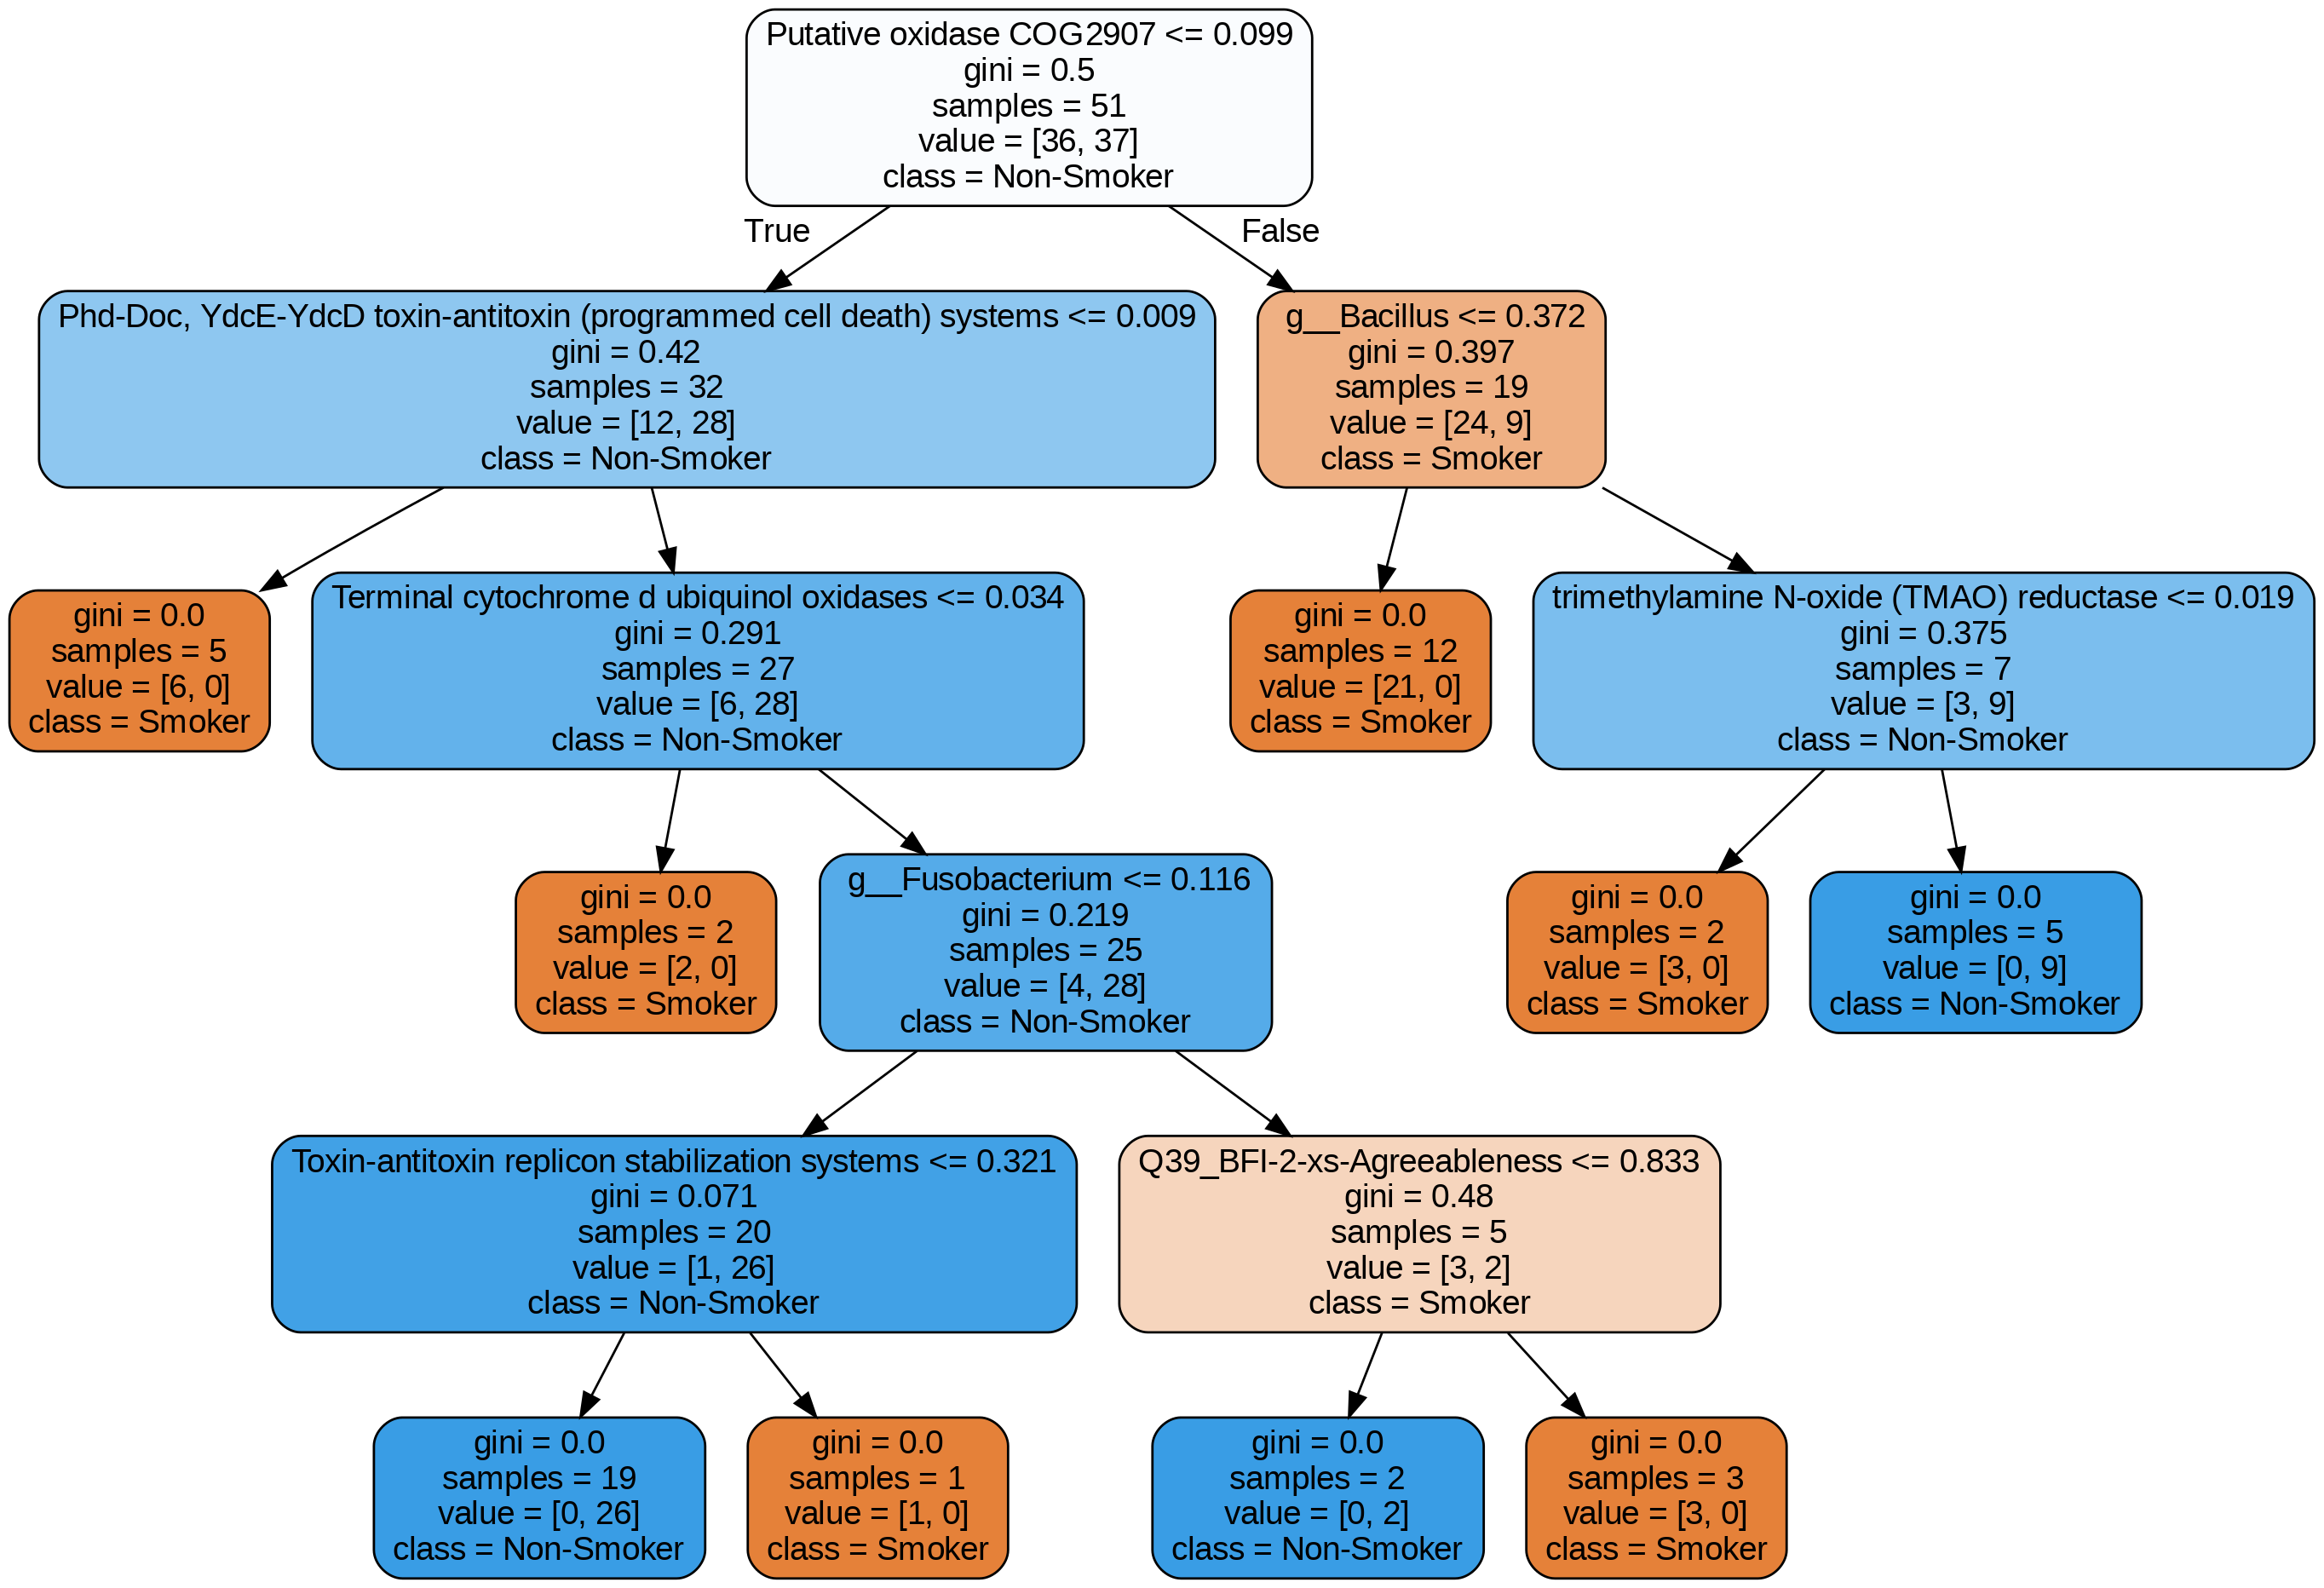

In [ ]:
from subprocess import call
from IPython.display import Image
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

This tree is a little simpler than the solitary decision tree model. Random search found that limiting the maximum depth of the trees in the forest delivers better performance than letting them expand as far as needed.

In [ ]:
importances = best_model.feature_importances_

In [ ]:
im = pd.DataFrame({'No': np.arange(1,len(markerss)+1), 'Feature': markerss, 'Importance': importances})
imp = im.sort_values(by=['Importance'],ascending = False)
imp.head(5)


No                             Feature  Importance
57  58                    g__Haemophilus_A    0.096690
33  34  Pyruvate:ferredoxin oxidoreductase    0.083090
54  55                     g__Leptotrichia    0.051522
29  30            Putative oxidase COG2907    0.045877
51  52                          g__Gemella    0.043419